In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# open a mixed capture from the IOT datasets
normal = pd.read_pickle('Datasets/IOT23/Malware-Capture-34-1/zeek_normal.pkl')
anomalous = pd.read_pickle('Datasets/IOT23/Malware-Capture-34-1/zeek_anomalous.pkl')

## The structure of the dataset

In [3]:
normal.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2018-12-21 14:50:16.870899916,192.168.1.1,40831,192.168.1.195,22,tcp,502.919185,SF,0,200,11444,184,28048,Benign,missing,0,1
1,2018-12-21 14:50:16.962094069,192.168.1.195,41040,185.244.25.235,80,tcp,3.139211,S0,0,3,180,0,0,Benign,missing,0,0
2,2018-12-21 14:50:24.181240082,192.168.1.195,41040,185.244.25.235,80,tcp,27.634336,S0,0,1,60,0,0,Benign,missing,0,0
3,2018-12-21 14:50:32.341331005,192.168.1.195,41040,185.244.25.235,80,tcp,27.634336,S0,0,1,60,0,0,Benign,missing,0,0
4,2018-12-21 14:50:40.458699942,192.168.1.195,123,147.231.100.5,123,udp,0.001496,SF,0,1,76,1,76,Benign,missing,1,1


## Some basic statistics of each class of the dataset

### Normal flows

In [4]:
normal.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000,1923.000000
mean,6958.153926,112.700468,3.555637,25.601664,13.003640,570.797712,1.092564,761.260530,0.942278,0.441498
std,16534.675227,24.289075,13.322369,354.807361,193.756806,7754.653924,7.642899,9150.682213,0.233278,0.496695
min,0.000000,1.000000,0.000010,0.000000,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000
25%,123.000000,123.000000,0.005618,0.000000,1.000000,76.000000,0.000000,0.000000,1.000000,0.000000
50%,123.000000,123.000000,1.160585,0.000000,1.000000,76.000000,0.000000,0.000000,1.000000,0.000000
75%,123.000000,123.000000,4.630235,0.000000,1.000000,76.000000,1.000000,76.000000,1.000000,1.000000
max,65279.000000,123.000000,502.919185,5792.000000,5110.000000,204400.000000,184.000000,168910.000000,1.000000,1.000000


### Anomalous flows

In [5]:
anomalous.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,21222.000000,21222.000000,21222.000000,21222.0,21222.000000,2.122200e+04,21222.000000,21222.000000,21222.000000,21222.000000
mean,60890.625860,2524.999152,8.804753,0.0,5.774526,3.944626e+03,0.567383,52.316417,0.000094,3.517246
std,7438.260405,5557.315896,361.937848,0.0,177.098819,5.225500e+05,8.362175,634.149762,0.009708,2.179876
min,0.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,55218.500000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
75%,65279.000000,6667.000000,3.105483,0.0,1.000000,6.000000e+01,0.000000,0.000000,0.000000,5.000000
max,65279.000000,63798.000000,48976.819063,0.0,18444.000000,7.606306e+07,1070.000000,74159.000000,1.000000,5.000000


#### DDoS flows

In [6]:
ddos = anomalous[anomalous['detailed_label'] == 'DDoS']
ddos.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,14394.000000,14394.000000,14394.000000,14394.0,14394.000000,1.439400e+04,14394.0,14394.0,14394.000000,14394.000000
mean,64728.724816,80.367931,0.031392,0.0,4.099764,5.397094e+03,0.0,0.0,0.000069,4.953453
std,5088.209153,44.142531,0.370396,0.0,188.018609,6.340048e+05,0.0,0.0,0.008335,0.480193
min,0.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000
25%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,5.000000
50%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,5.000000
75%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,5.000000
max,65279.000000,5376.000000,24.128182,0.0,18444.000000,7.606306e+07,0.0,0.0,1.000000,5.000000


#### C&C flows

In [7]:
cc = anomalous[anomalous['detailed_label'] == 'C&C']
cc.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,6706.000000,6706.0,6706.000000,6706.0,6706.000000,6706.000000,6706.000000,6706.000000,6706.0,6706.000000
mean,53147.079034,6667.0,27.731147,0.0,3.691619,229.573069,1.795556,165.562034,0.0,0.498509
std,2361.045434,0.0,643.491422,0.0,9.039546,658.306354,14.802255,1119.830511,0.0,0.881535
min,48986.000000,6667.0,0.833774,0.0,1.000000,60.000000,0.000000,0.000000,0.0,0.000000
25%,51068.000000,6667.0,3.106484,0.0,1.000000,60.000000,0.000000,0.000000,0.0,0.000000
50%,53227.000000,6667.0,3.159205,0.0,3.000000,180.000000,0.000000,0.000000,0.0,0.000000
75%,55218.000000,6667.0,27.634336,0.0,3.000000,180.000000,0.000000,0.000000,0.0,0.000000
max,57120.000000,6667.0,48976.819063,0.0,606.000000,45630.000000,1070.000000,74159.000000,0.0,4.000000


#### Port scan flows

In [8]:
scan = anomalous[anomalous['detailed_label'] == 'PartOfAHorizontalPortScan']
scan.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,122.000000,122.000000,122.000000,122.0,122.000000,1.220000e+02,122.0,122.0,122.000000,122.0
mean,33699.057377,63277.163934,3.586407,0.0,317.860656,3.678325e+04,0.0,0.0,0.008197,0.0
std,22221.289104,5752.822375,0.400617,0.0,1091.925589,2.708543e+05,0.0,0.0,0.090536,0.0
min,0.000000,256.000000,0.938716,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0
25%,11933.250000,63798.000000,3.608289,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0
50%,34036.500000,63798.000000,3.608289,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0
75%,54312.000000,63798.000000,3.608289,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0
max,65279.000000,63798.000000,4.988906,0.0,5110.000000,2.965156e+06,0.0,0.0,1.000000,0.0


## Heatmap of all the flows

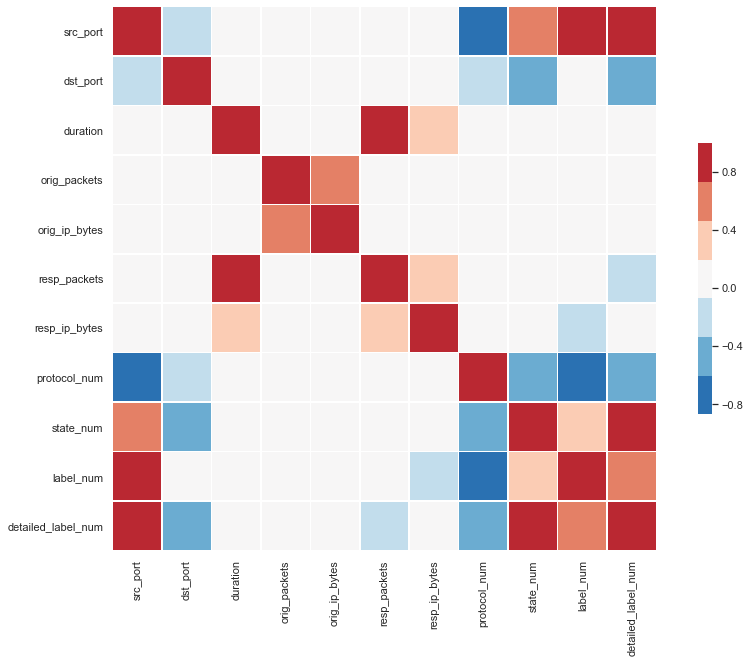

In [9]:
data = pd.concat([normal, anomalous], ignore_index=True).sort_values(by='date')
data['label_num'] = pd.Categorical(data['label'], categories=data['label'].unique()).codes
data['detailed_label_num'] = pd.Categorical(data['detailed_label'], categories=data['detailed_label'].unique()).codes
sns.set(style="white")
corr = data.drop(columns='missed_bytes').corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Heatmap of anomalous data

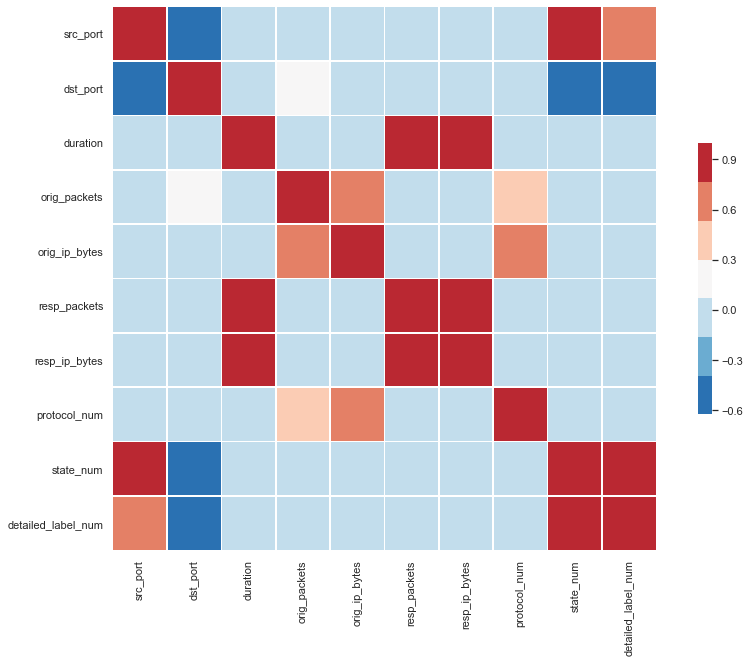

In [11]:
sns.set(style="white")
corr = data.drop(columns=['label_num', 'missed_bytes'])[data['detailed_label_num'] != 0].corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Host level analysis

### Normal flows

#### Duration and avg time between flows per host

In [12]:
normal_grouped_source_ip_time = normal.groupby('src_ip').agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
normal_grouped_source_ip_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
normal_grouped_source_ip_time = normal_grouped_source_ip_time.sort_values(by=['count'], ascending=False).reset_index()
normal_grouped_source_ip_time

/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,src_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.1.195,1922,3.295822,1.151969,72.172598,0.000010,6.906585,00:00:44.972673,00:00:28.000298,00:08:52.001497,00:00:00.000006,00:01:06.135176
1,192.168.1.1,1,502.919185,502.919185,502.919185,502.919185,NaN,NaT,NaT,NaT,NaT,NaT


#### Keeping only the IP with the highest number of flows

In [13]:
# since we basically have only one IP with sufficient number of flows we will examine only that one
normal_ip = normal[normal['src_ip'] == '192.168.1.195'].reset_index(drop=True)
normal_ip['orig_packets_per_s'] = normal_ip['orig_packets'] / normal_ip['duration']
normal_ip['resp_packets_per_s'] = normal_ip['resp_packets'] / normal_ip['duration']
normal_ip['orig_bytes_per_s'] = normal_ip['orig_ip_bytes'] / normal_ip['duration']
normal_ip['resp_bytes_per_s'] = normal_ip['resp_ip_bytes'] / normal_ip['duration']
normal_ip['packets_diff'] = normal_ip['orig_packets'] - normal_ip['resp_packets']
normal_ip['bytes_diff'] = normal_ip['orig_ip_bytes'] - normal_ip['resp_ip_bytes']
normal_ip['packets_per_s_diff'] = normal_ip['orig_packets_per_s'] - normal_ip['resp_packets_per_s']
normal_ip['bytes_per_s_diff'] = normal_ip['orig_bytes_per_s'] - normal_ip['resp_bytes_per_s']
normal_ip

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-12-21 14:50:16.962094069,192.168.1.195,41040,185.244.25.235,80,tcp,3.139211,S0,0,3,...,0,0,0.955654,0.000000,57.339249,0.000000,3,180,0.955654,57.339249
1,2018-12-21 14:50:24.181240082,192.168.1.195,41040,185.244.25.235,80,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
2,2018-12-21 14:50:32.341331005,192.168.1.195,41040,185.244.25.235,80,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
3,2018-12-21 14:50:40.458699942,192.168.1.195,123,147.231.100.5,123,udp,0.001496,SF,0,1,...,1,1,668.449198,668.449198,50802.139037,50802.139037,0,0,0.000000,0.000000
4,2018-12-21 14:50:48.981338024,192.168.1.195,41040,185.244.25.235,80,tcp,1.477656,SF,2896,94,...,0,1,63.614265,64.967760,3739.029923,94097.679027,-2,-133519,-1.353495,-90358.649104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,2018-12-22 14:49:53.475646019,192.168.1.195,43718,192.168.1.1,53,udp,4.210705,S0,0,1,...,1,0,0.237490,0.000000,15.911824,0.000000,1,67,0.237490,15.911824
1918,2018-12-22 14:49:58.459568024,192.168.1.195,123,89.221.210.188,123,udp,2.001978,S0,0,1,...,1,0,0.499506,0.000000,37.962448,0.000000,1,76,0.499506,37.962448
1919,2018-12-22 14:49:58.463563919,192.168.1.195,123,147.251.48.140,123,udp,0.004983,S0,0,1,...,1,0,200.682320,0.000000,15251.856311,0.000000,1,76,200.682320,15251.856311
1920,2018-12-22 14:49:59.460982084,192.168.1.195,60967,192.168.1.1,53,udp,5.001395,S0,0,2,...,1,0,0.399888,0.000000,26.792525,0.000000,2,134,0.399888,26.792525


In [14]:
normal_ip.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1922.000000,1.922000e+03,1922.000000,1922.000000,1922.000000,1922.000000,1.922000e+03
mean,6940.530177,112.747659,3.295822,25.614984,12.906348,565.140479,0.997399,747.063476,0.942768,0.441207,4458.740163,133.339553,3.387406e+05,10850.526947,11.908949,-181.922997,4325.400610,3.278901e+05
std,16520.902402,24.207056,6.906585,354.899218,193.760239,7752.701789,6.404668,9131.855210,0.232346,0.496661,20304.399989,261.936868,1.543169e+06,22926.333953,193.711753,11715.617880,20331.112653,1.545354e+06
min,0.000000,1.000000,0.000010,0.000000,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.017262,0.000000,1.311889e+00,0.000000,-3.000000,-162303.000000,-1.353495,-1.287726e+05
25%,123.000000,123.000000,0.005557,0.000000,1.000000,76.000000,0.000000,0.000000,1.000000,0.000000,0.371247,0.000000,2.677653e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,123.000000,123.000000,1.151969,0.000000,1.000000,76.000000,0.000000,0.000000,1.000000,0.000000,4.942955,0.000000,3.828883e+02,0.000000,1.000000,76.000000,0.142613,1.083858e+01
75%,123.000000,123.000000,4.630235,0.000000,1.000000,76.000000,1.000000,76.000000,1.000000,1.000000,198.152875,67.862172,1.505962e+04,5850.203987,1.000000,76.000000,0.399667,2.821479e+01
max,65279.000000,123.000000,72.172598,5792.000000,5110.000000,204400.000000,117.000000,168910.000000,1.000000,1.000000,100000.000000,2012.072435,7.600000e+06,328657.314629,5110.000000,204400.000000,100000.000000,7.600000e+06


#### Remove the outliers

In [ ]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
normal_ip = normal_ip[(np.abs(stats.zscore(normal_ip[continuous])) < 3).all(axis=1)]
normal_ip.describe()

### Anomalous flows

#### Duration and avg time between flows per host

In [15]:
anomalous_grouped_source_ip_time = anomalous.groupby('src_ip').agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
anomalous_grouped_source_ip_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
anomalous_grouped_source_ip_time = anomalous_grouped_source_ip_time.sort_values(by=['count'], ascending=False).reset_index()
anomalous_grouped_source_ip_time

,src_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.1.195,21222,8.804753,0.00001,48976.819063,0.00001,361.937848,00:00:04.056434,00:00:00.000258,07:17:49.621514,00:00:00.000005,00:03:09.460670


#### Add some more features

In [16]:
# since we basically have only one IP with sufficient number of flows we will examine only that one
anomalous['orig_packets_per_s'] = anomalous['orig_packets'] / anomalous['duration']
anomalous['resp_packets_per_s'] = anomalous['resp_packets'] / anomalous['duration']
anomalous['orig_bytes_per_s'] = anomalous['orig_ip_bytes'] / anomalous['duration']
anomalous['resp_bytes_per_s'] = anomalous['resp_ip_bytes'] / anomalous['duration']
anomalous['packets_diff'] = anomalous['orig_packets'] - anomalous['resp_packets']
anomalous['bytes_diff'] = anomalous['orig_ip_bytes'] - anomalous['resp_ip_bytes']
anomalous['packets_per_s_diff'] = anomalous['orig_packets_per_s'] - anomalous['resp_packets_per_s']
anomalous['bytes_per_s_diff'] = anomalous['orig_bytes_per_s'] - anomalous['resp_bytes_per_s']
anomalous

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-12-21 14:55:32.353979111,192.168.1.195,48986,185.244.25.235,6667,tcp,3.107733,S0,0,3,...,0,0,0.965334,0.000000,57.920034,0.000000,3,180,0.965334,57.920034
1,2018-12-21 14:55:39.541642904,192.168.1.195,48986,185.244.25.235,6667,tcp,48976.819063,RSTR,0,606,...,0,3,0.012373,0.021847,0.931665,1.514165,-464,-28529,-0.009474,-0.582500
2,2018-12-21 15:00:09.843813896,192.168.1.195,48994,185.244.25.235,6667,tcp,1.128098,S3,0,7,...,0,2,6.205135,5.318687,396.242170,499.070116,1,-116,0.886448,-102.827946
3,2018-12-21 15:00:10.924437046,192.168.1.195,48998,185.244.25.235,6667,tcp,3.097488,S0,0,3,...,0,0,0.968527,0.000000,58.111605,0.000000,3,180,0.968527,58.111605
4,2018-12-21 15:00:18.101866007,192.168.1.195,48998,185.244.25.235,6667,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21217,2018-12-22 14:49:53.942378998,192.168.1.195,57116,185.244.25.235,6667,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
21218,2018-12-22 14:49:56.773278952,192.168.1.195,57118,185.244.25.235,6667,tcp,3.088974,S0,0,3,...,0,0,0.971196,0.000000,58.271776,0.000000,3,180,0.971196,58.271776
21219,2018-12-22 14:50:03.942172050,192.168.1.195,57118,185.244.25.235,6667,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
21220,2018-12-22 14:50:06.779314995,192.168.1.195,57120,185.244.25.235,6667,tcp,3.082978,S0,0,3,...,0,0,0.973085,0.000000,58.385107,0.000000,3,180,0.973085,58.385107


In [17]:
anomalous.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,21222.000000,21222.000000,21222.000000,21222.0,21222.000000,2.122200e+04,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,21222.000000,2.122200e+04,21222.000000,21222.000000,2.122200e+04,21222.000000,2.122200e+04
mean,60890.625860,2524.999152,8.804753,0.0,5.774526,3.944626e+03,0.567383,52.316417,0.000094,3.517246,1.655305,0.189420,3.687437e+02,17.504707,5.207144,3.892309e+03,1.465884,3.512390e+02
std,7438.260405,5557.315896,361.937848,0.0,177.098819,5.225500e+05,8.362175,634.149762,0.009708,2.179876,40.566743,0.914441,3.067412e+04,84.569526,177.068722,5.225503e+05,40.558847,3.067425e+04
min,0.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-464.000000,-2.852900e+04,-0.793775,-1.746305e+02
25%,55218.500000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,65279.000000,6667.000000,3.105483,0.0,1.000000,6.000000e+01,0.000000,0.000000,0.000000,5.000000,0.036187,0.000000,2.171212e+00,0.000000,1.000000,4.000000e+01,0.036187,2.171212e+00
max,65279.000000,63798.000000,48976.819063,0.0,18444.000000,7.606306e+07,1070.000000,74159.000000,1.000000,5.000000,2574.939125,7.777899,3.158736e+06,675.242932,18444.000000,7.606306e+07,2574.939125,3.158736e+06


#### Remove outliers

In [ ]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
anomalous = anomalous[(np.abs(stats.zscore(anomalous[continuous])) < 3).all(axis=1)]
anomalous.describe()

#### Investigate each type of malicious flows

In [18]:
ddos = anomalous[anomalous['detailed_label'] == 'DDoS']
ddos.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,14394.000000,14394.000000,14394.000000,14394.0,14394.000000,1.439400e+04,14394.0,14394.0,14394.000000,14394.000000,14394.000000,14394.0,1.439400e+04,14394.0,14394.000000,1.439400e+04,14394.000000,1.439400e+04
mean,64728.724816,80.367931,0.031392,0.0,4.099764,5.397094e+03,0.0,0.0,0.000069,4.953453,1.118218,0.0,2.616163e+02,0.0,4.099764,5.397094e+03,1.118218,2.616163e+02
std,5088.209153,44.142531,0.370396,0.0,188.018609,6.340048e+05,0.0,0.0,0.008335,0.480193,40.022323,0.0,2.632309e+04,0.0,188.018609,6.340048e+05,40.022323,2.632309e+04
min,0.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,5.000000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,5.000000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
75%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000e+00,0.0,0.0,0.000000,5.000000,0.000000,0.0,0.000000e+00,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00
max,65279.000000,5376.000000,24.128182,0.0,18444.000000,7.606306e+07,0.0,0.0,1.000000,5.000000,2574.939125,0.0,3.152457e+06,0.0,18444.000000,7.606306e+07,2574.939125,3.152457e+06


In [19]:
cc = anomalous[anomalous['detailed_label'] == 'C&C']
cc.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,6706.000000,6706.0,6706.000000,6706.0,6706.000000,6706.000000,6706.000000,6706.000000,6706.0,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,53147.079034,6667.0,27.731147,0.0,3.691619,229.573069,1.795556,165.562034,0.0,0.498509,1.137989,0.599445,70.921422,55.395899,1.896063,64.011035,0.538544,15.525524
std,2361.045434,0.0,643.491422,0.0,9.039546,658.306354,14.802255,1119.830511,0.0,0.881535,1.767192,1.549424,112.717327,143.305333,6.187941,476.380851,0.478899,43.436247
min,48986.000000,6667.0,0.833774,0.0,1.000000,60.000000,0.000000,0.000000,0.0,0.000000,0.012373,0.000000,0.931665,0.000000,-464.000000,-28529.000000,-0.793775,-174.630478
25%,51068.000000,6667.0,3.106484,0.0,1.000000,60.000000,0.000000,0.000000,0.0,0.000000,0.036187,0.000000,2.171212,0.000000,1.000000,60.000000,0.036187,2.171212
50%,53227.000000,6667.0,3.159205,0.0,3.000000,180.000000,0.000000,0.000000,0.0,0.000000,0.952169,0.000000,57.130162,0.000000,2.000000,60.000000,0.839417,2.171212
75%,55218.000000,6667.0,27.634336,0.0,3.000000,180.000000,0.000000,0.000000,0.0,0.000000,0.968294,0.000000,58.097669,0.000000,3.000000,180.000000,0.961629,57.513449
max,57120.000000,6667.0,48976.819063,0.0,606.000000,45630.000000,1070.000000,74159.000000,0.0,4.000000,9.594926,7.777899,612.875911,675.242932,17.000000,1710.000000,2.898114,112.529609


In [20]:
scan = anomalous[anomalous['detailed_label'] == 'PartOfAHorizontalPortScan']
scan.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,122.000000,122.000000,122.000000,122.0,122.000000,1.220000e+02,122.0,122.0,122.000000,122.0,122.000000,122.0,1.220000e+02,122.0,122.000000,1.220000e+02,122.000000,1.220000e+02
mean,33699.057377,63277.163934,3.586407,0.0,317.860656,3.678325e+04,0.0,0.0,0.008197,0.0,93.458141,0.0,2.937848e+04,0.0,317.860656,3.678325e+04,93.458141,2.937848e+04
std,22221.289104,5752.822375,0.400617,0.0,1091.925589,2.708543e+05,0.0,0.0,0.090536,0.0,298.937249,0.0,2.858998e+05,0.0,1091.925589,2.708543e+05,298.937249,2.858998e+05
min,0.000000,256.000000,0.938716,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0,0.277140,0.0,1.108559e+01,0.0,1.000000,4.000000e+01,0.277140,1.108559e+01
25%,11933.250000,63798.000000,3.608289,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0,0.277140,0.0,1.108559e+01,0.0,1.000000,4.000000e+01,0.277140,1.108559e+01
50%,34036.500000,63798.000000,3.608289,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0,0.277140,0.0,1.108559e+01,0.0,1.000000,4.000000e+01,0.277140,1.108559e+01
75%,54312.000000,63798.000000,3.608289,0.0,1.000000,4.000000e+01,0.0,0.0,0.000000,0.0,0.277140,0.0,1.108559e+01,0.0,1.000000,4.000000e+01,0.277140,1.108559e+01
max,65279.000000,63798.000000,4.988906,0.0,5110.000000,2.965156e+06,0.0,0.0,1.000000,0.0,1188.155293,0.0,3.158736e+06,0.0,5110.000000,2.965156e+06,1188.155293,3.158736e+06


#### Remove the outliers from each malicious category

In [ ]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
ddos = ddos[(np.abs(stats.zscore(ddos[continuous])) < 3).all(axis=1)]
ddos.describe()

In [ ]:
cc = cc[(np.abs(stats.zscore(cc[continuous])) < 3).all(axis=1)]
cc.describe()

In [ ]:
scan = scan[(np.abs(stats.zscore(scan[continuous])) < 3).all(axis=1)]
scan.describe()

## Let's plot now!!!

### Heatmap of all the flows

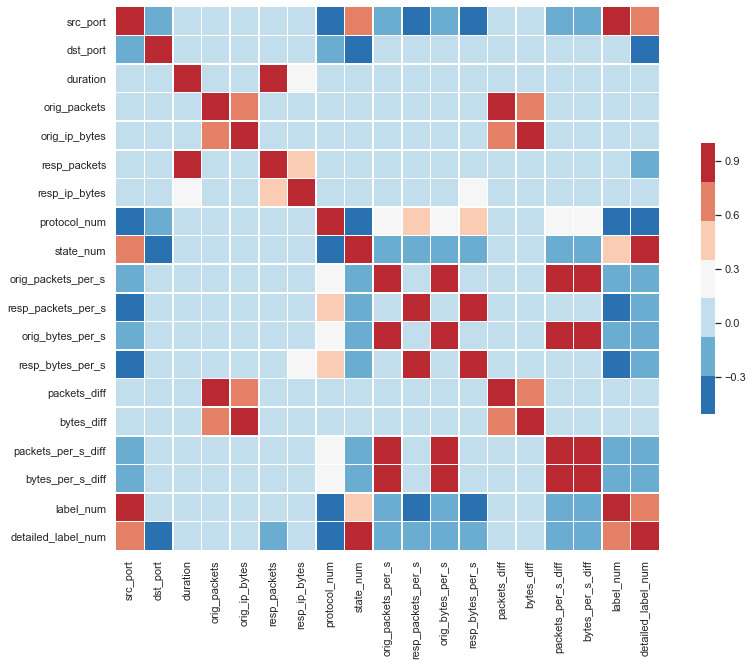

In [21]:
data_ip = pd.concat([normal_ip, anomalous], ignore_index=True).sort_values(by='date')
data_ip['label_num'] = pd.Categorical(data_ip['label'], categories=data_ip['label'].unique()).codes
data_ip['detailed_label_num'] = pd.Categorical(data_ip['detailed_label'], categories=data_ip['detailed_label'].unique()).codes
sns.set(style="white")
corr = data_ip.drop(columns='missed_bytes').corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Heatmap of anomalous flows

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


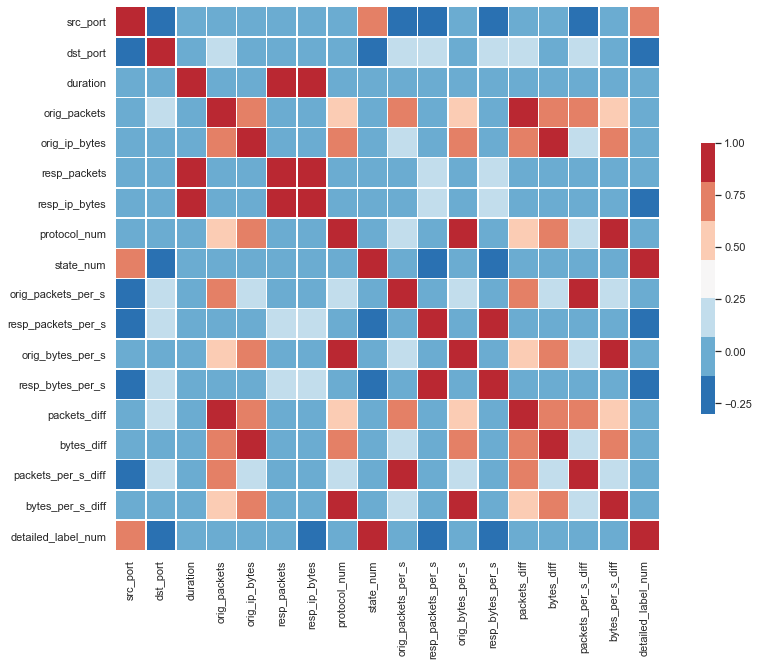

In [22]:
sns.set(style="white")
corr = data_ip.drop(columns=['label_num', 'missed_bytes'])[data['detailed_label_num'] != 0].corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Duration against time

#### Normal flows

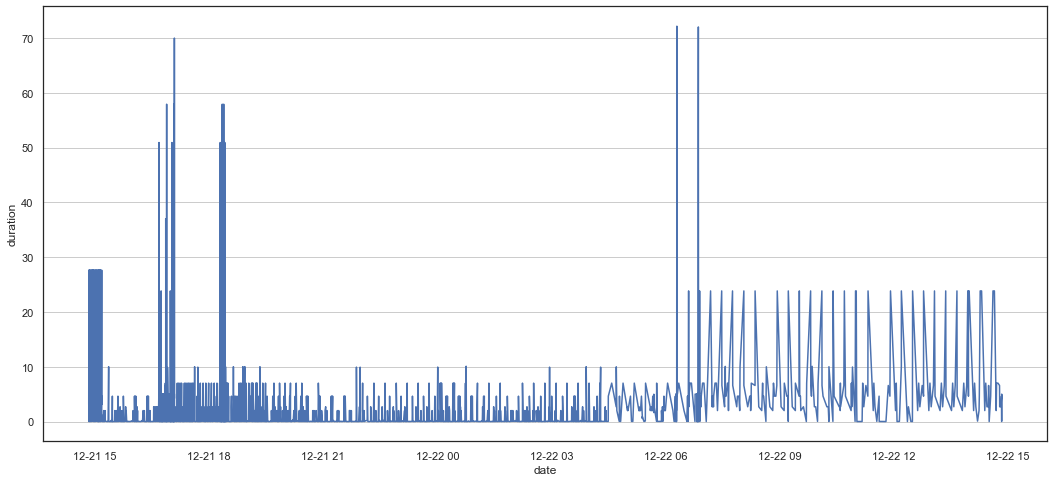

In [23]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="date", y="duration", data=normal_ip)
plt.grid(axis='y')

#### All anomalous flows

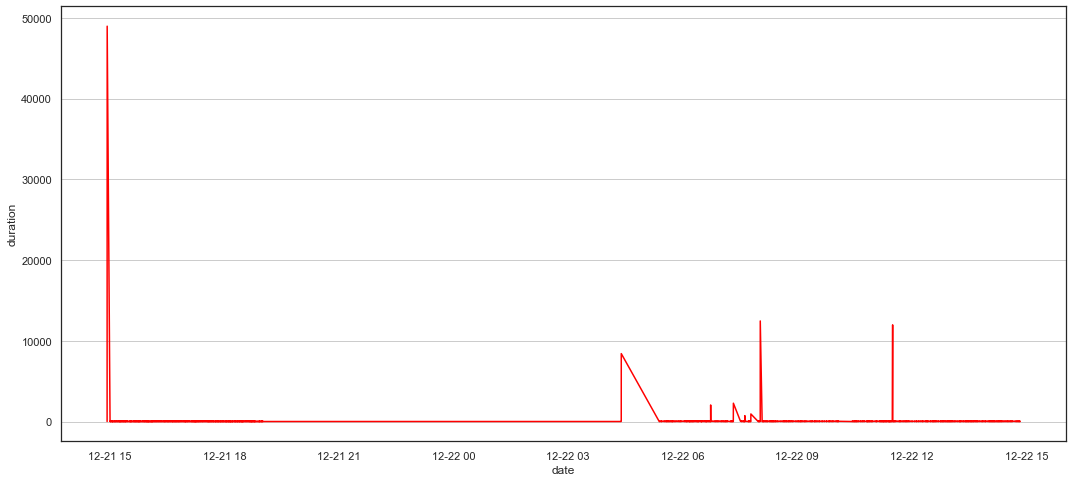

In [24]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="date", y="duration", data=anomalous, color='red')
plt.grid(axis='y')

#### Only DDos flows

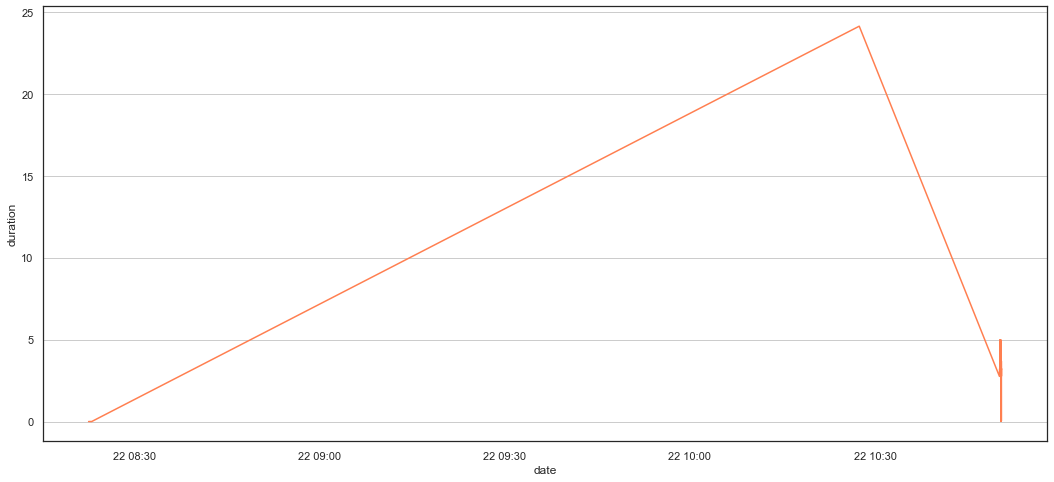

In [25]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="date", y="duration", data=ddos, color='coral')
plt.grid(axis='y')

#### Only C&C flows

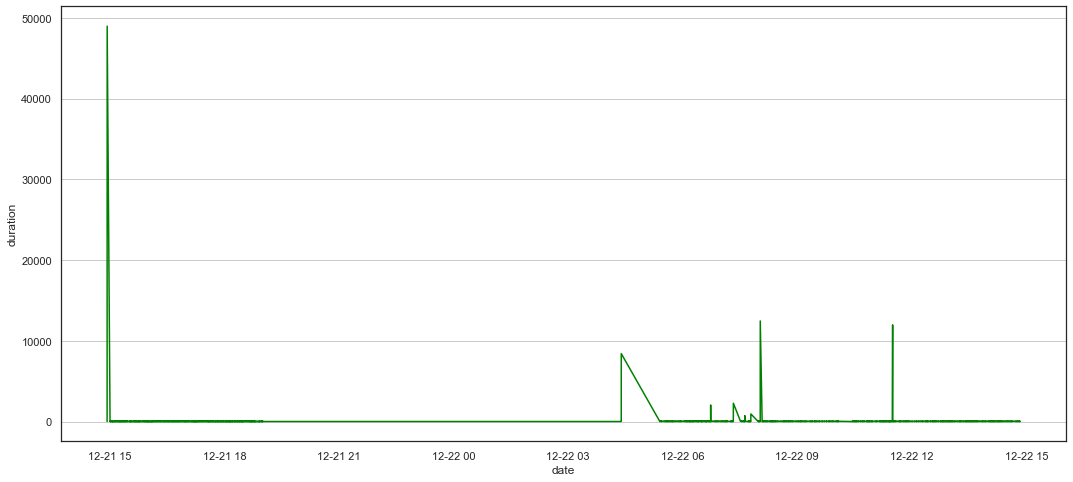

In [26]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="date", y="duration", data=cc, color='green')
plt.grid(axis='y')

#### Only port scan flows

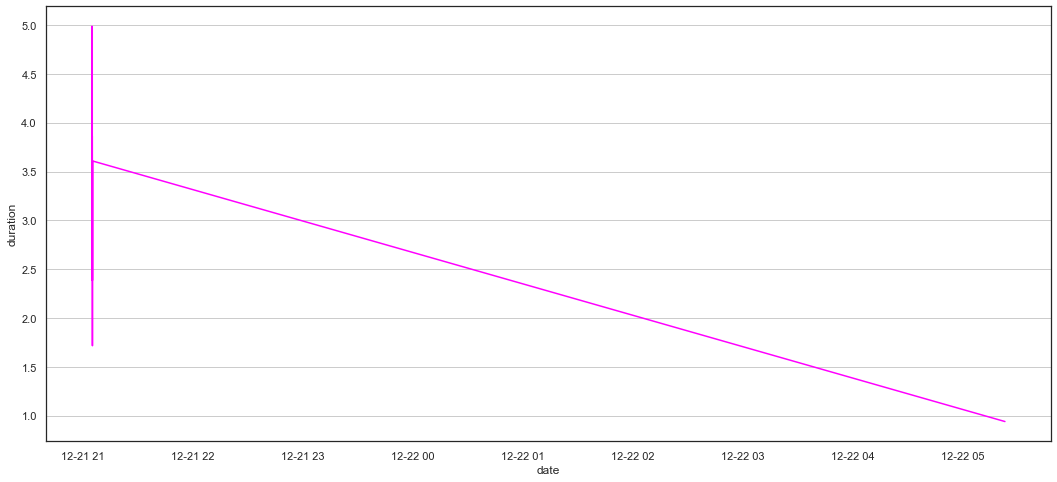

In [27]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="date", y="duration", data=scan, color='magenta')
plt.grid(axis='y')

### Number of bytes against time

#### Normal flows

Text(0, 0.5, 'Number of bytes')

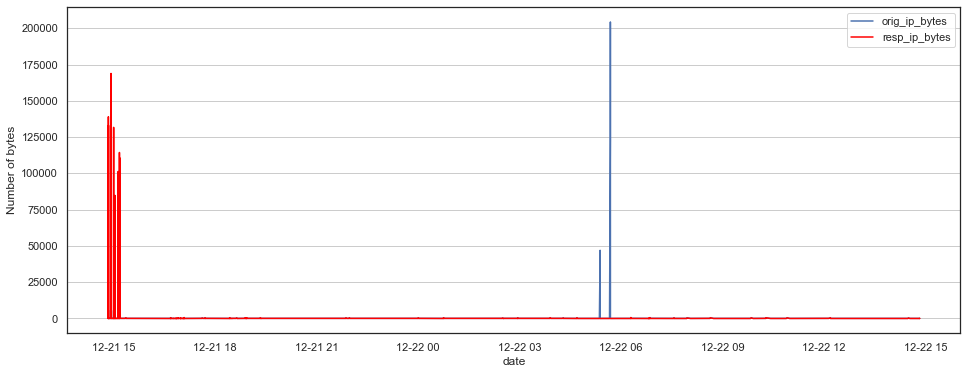

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=normal_ip, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=normal_ip, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

#### All anomalous flows

Text(0, 0.5, 'Number of bytes')

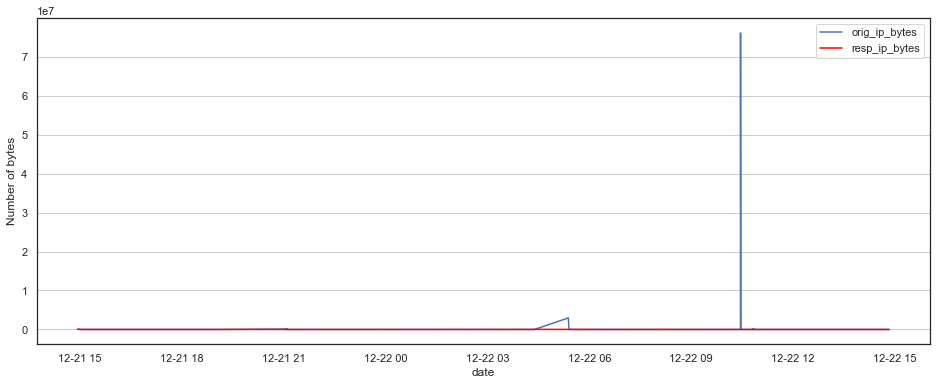

In [29]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=anomalous, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=anomalous, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

#### Only ddos flows

Text(0, 0.5, 'Number of bytes')

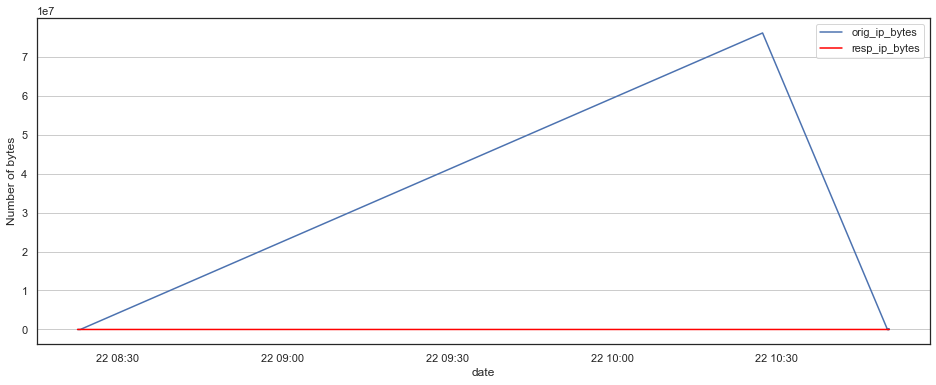

In [30]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=ddos, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=ddos, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

#### Only C&C flows

Text(0, 0.5, 'Number of bytes')

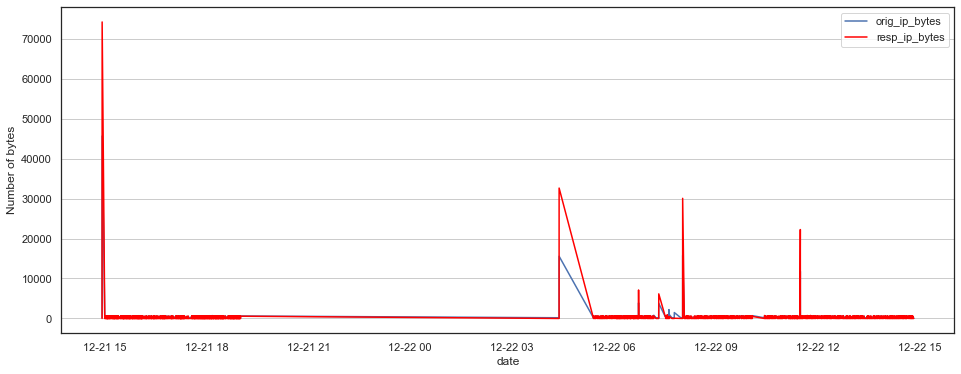

In [31]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=cc, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=cc, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

#### Only port scan flows

Text(0, 0.5, 'Number of bytes')

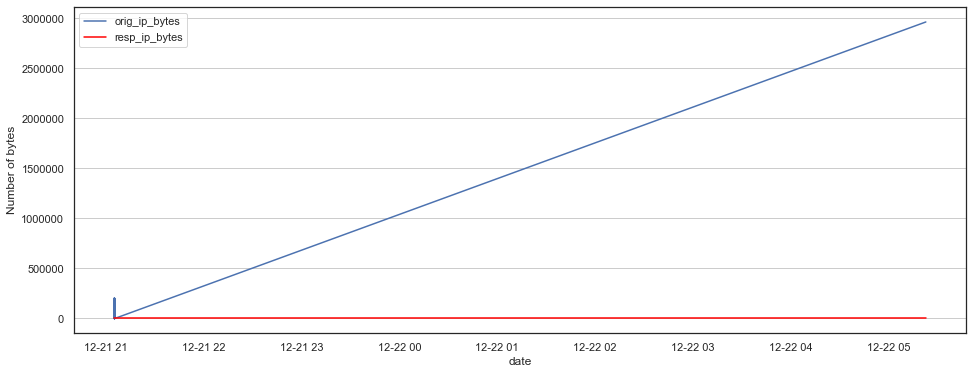

In [32]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=scan, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=scan, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time

#### Normal flows

Text(0, 0.5, 'Number of packets')

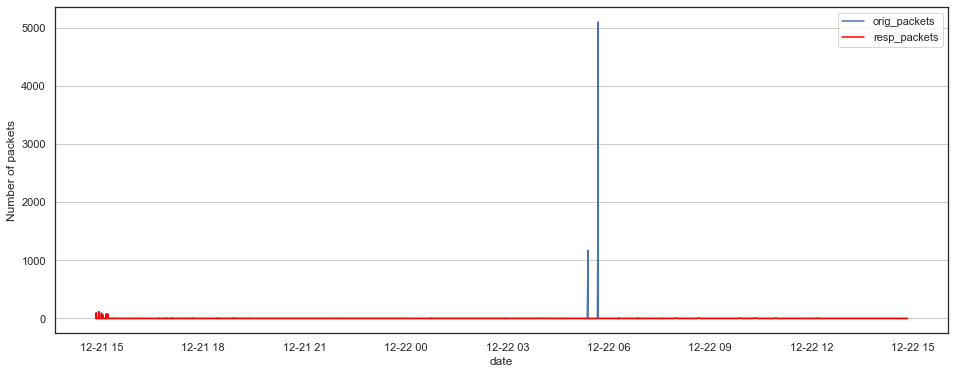

In [33]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=normal_ip, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=normal_ip, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

#### All anomalous flows

Text(0, 0.5, 'Number of packets')

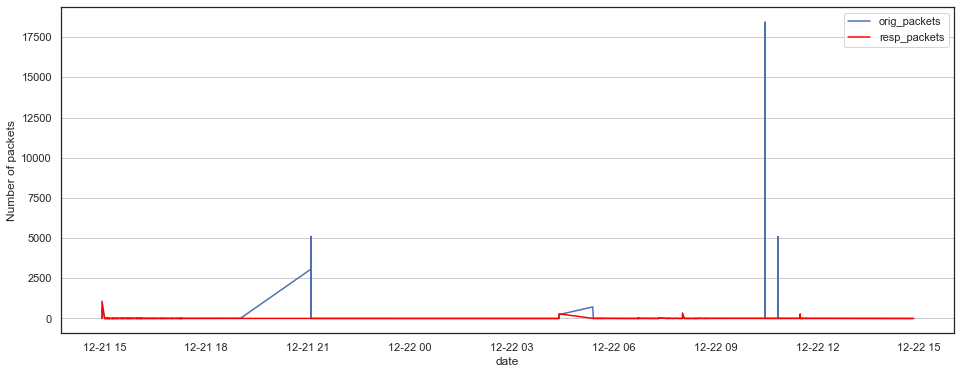

In [34]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=anomalous, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=anomalous, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

#### Only ddos flows

Text(0, 0.5, 'Number of packets')

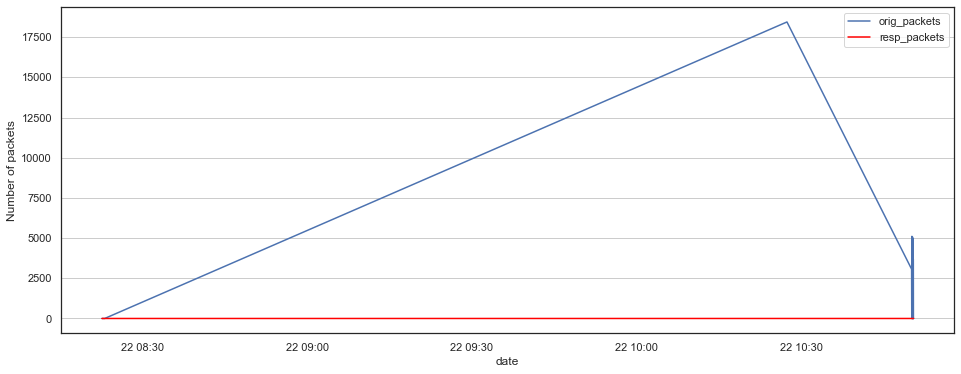

In [35]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=ddos, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=ddos, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

#### Only C&C flows

Text(0, 0.5, 'Number of packets')

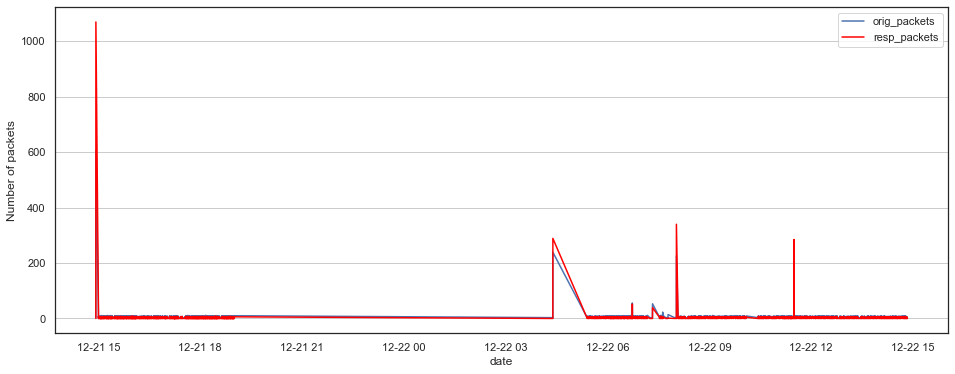

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=cc, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=cc, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

#### Only port scan flows

Text(0, 0.5, 'Number of packets')

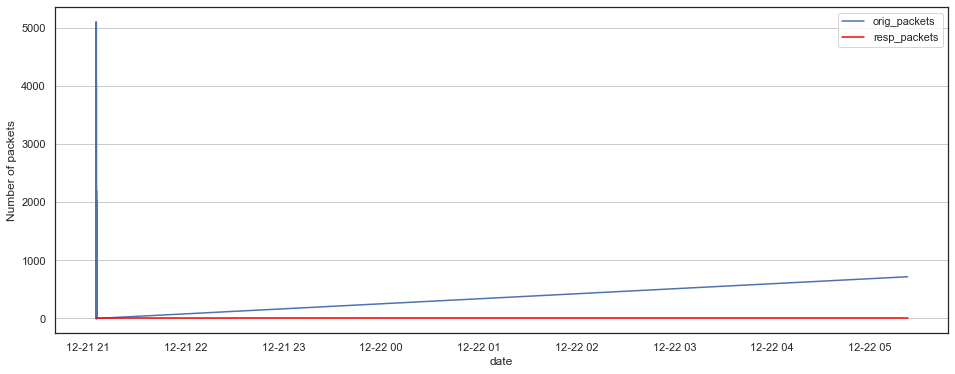

In [37]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=scan, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=scan, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's vs Responder's bytes/sec and packets/sec against time

#### Normal flows

Text(0, 0.5, 'Bytes / sec')

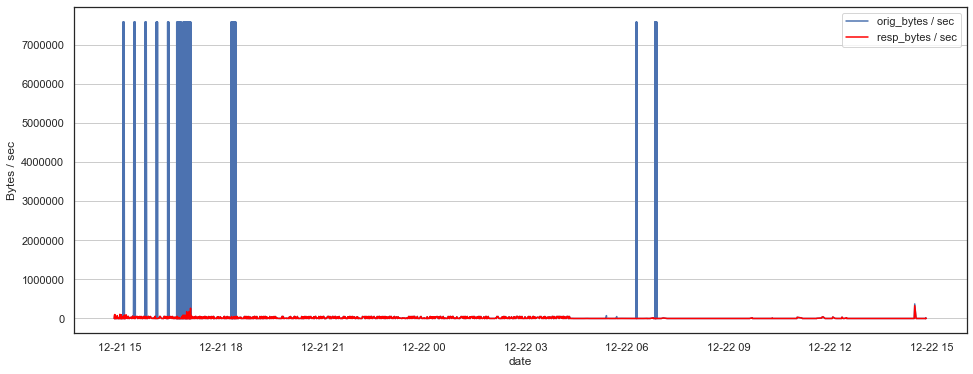

In [38]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=normal_ip, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=normal_ip, label='resp_bytes / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

Text(0, 0.5, 'Packets / sec')

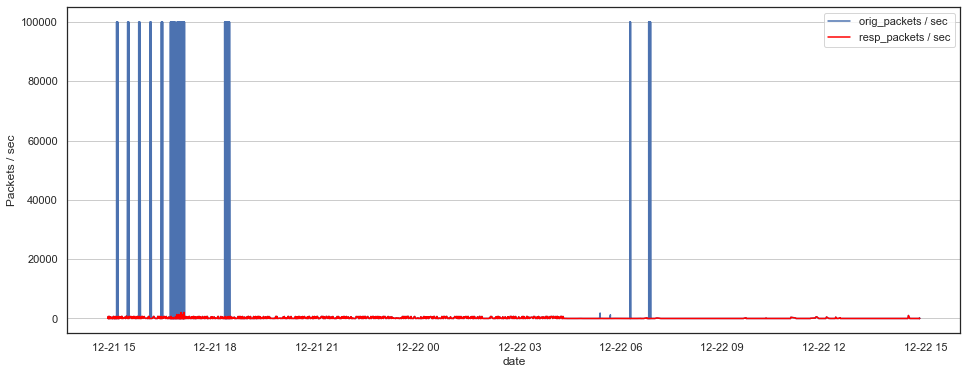

In [39]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=normal_ip, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=normal_ip, label='resp_packets / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Packets / sec")

#### All anomalous flows

Text(0, 0.5, 'Bytes / sec')

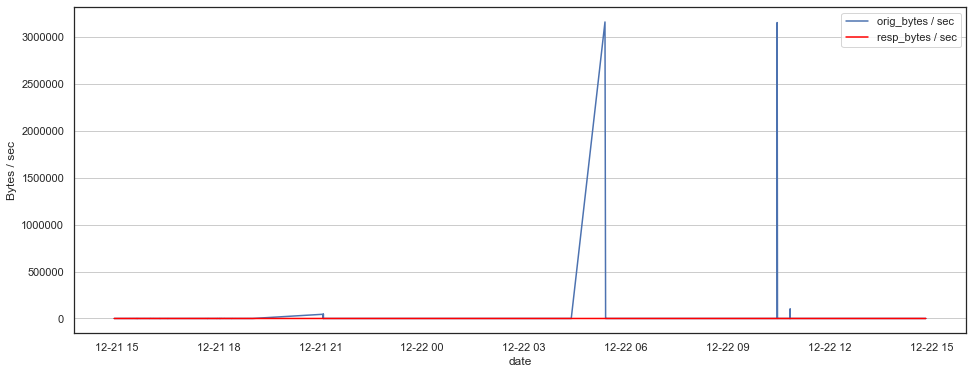

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=anomalous, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=anomalous, label='resp_bytes / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

Text(0, 0.5, 'Packets / sec')

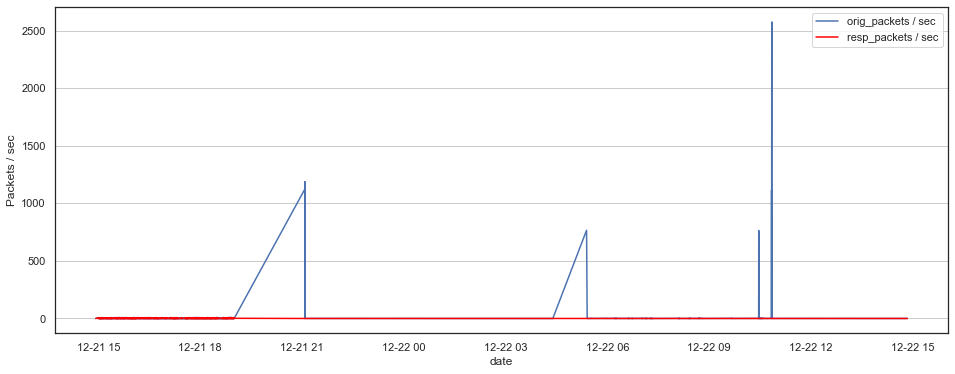

In [41]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=anomalous, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=anomalous, label='resp_packets / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Packets / sec")

#### Only ddos flows

Text(0, 0.5, 'Bytes / sec')

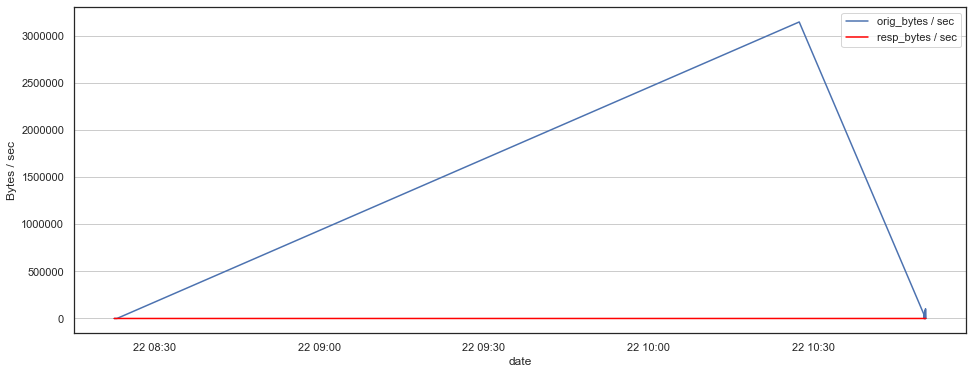

In [42]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=ddos, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=ddos, label='resp_bytes / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

Text(0, 0.5, 'Packets / sec')

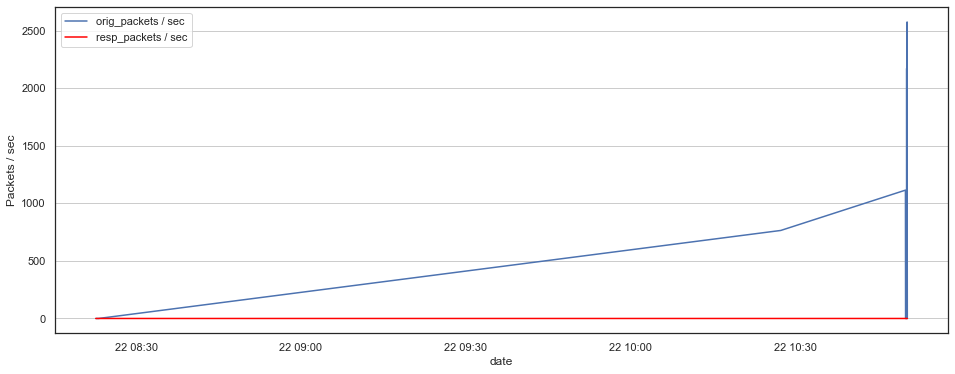

In [43]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=ddos, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=ddos, label='resp_packets / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Packets / sec")

#### Only C&C flows

Text(0, 0.5, 'Bytes / sec')

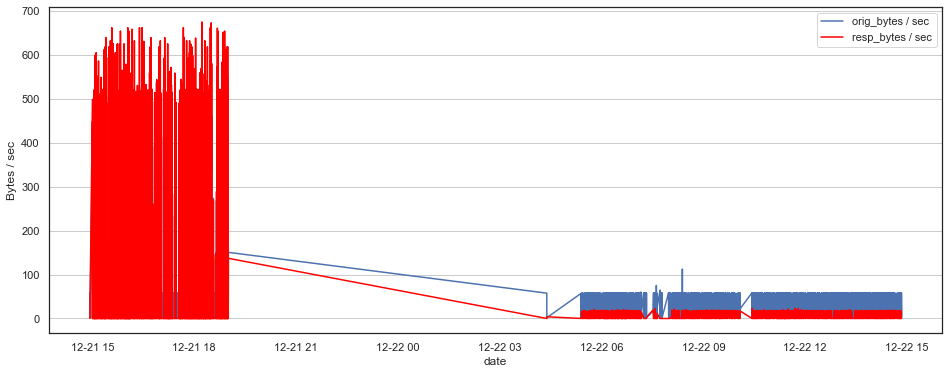

In [44]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=cc, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=cc, label='resp_bytes / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

Text(0, 0.5, 'Packets / sec')

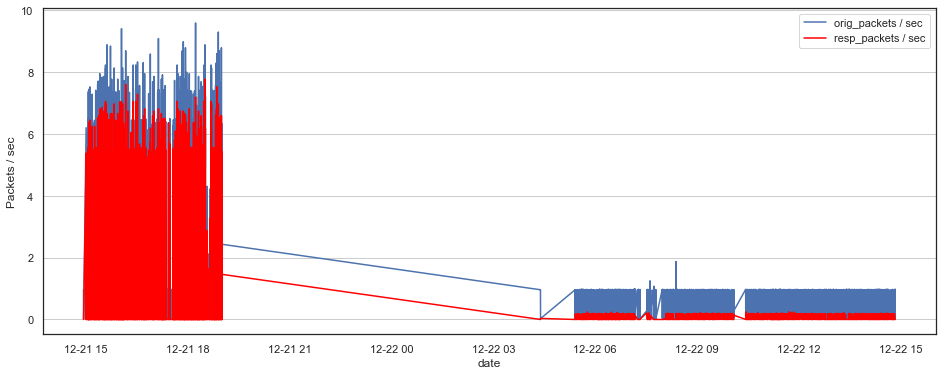

In [45]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=cc, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=cc, label='resp_packets / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Packets / sec")

#### Only port scan flows

Text(0, 0.5, 'Bytes / sec')

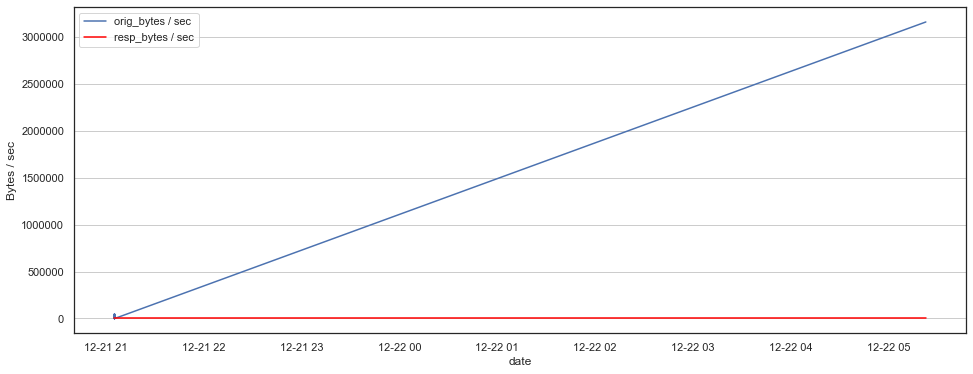

In [46]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=scan, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=scan, label='resp_bytes / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

Text(0, 0.5, 'Packets / sec')

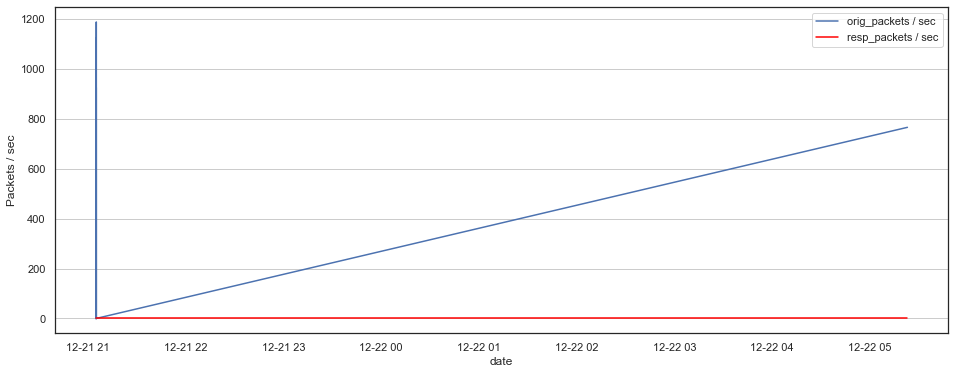

In [47]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=scan, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=scan, label='resp_packets / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Packets / sec")

### Protocol type distribution

#### Normal flows

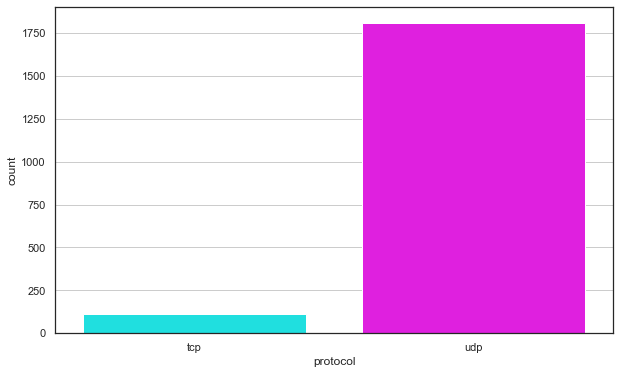

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=normal_ip, palette=['cyan', 'magenta'])
plt.grid(axis='y')

#### Anomalous flows

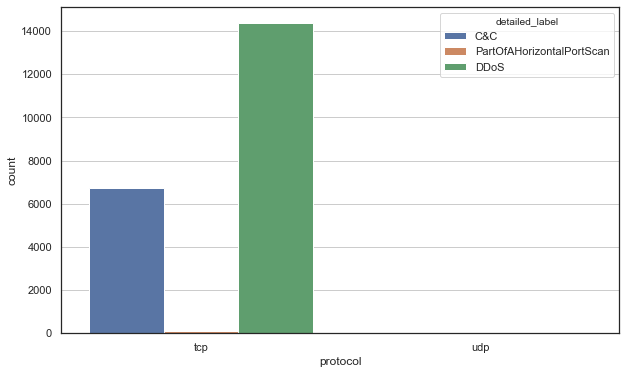

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=anomalous, hue='detailed_label')
plt.grid(axis='y')

### Packets sent per protocol

#### Normal flows

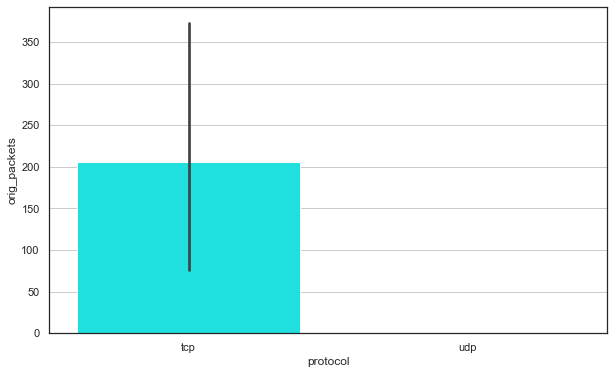

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=normal_ip, palette=['cyan', 'magenta'])
plt.grid(axis='y')

#### Anomalous flows

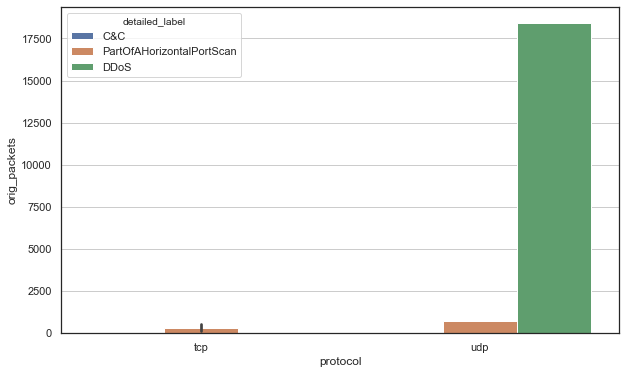

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=anomalous, hue='detailed_label')
plt.grid(axis='y')

### Packets received per protocol

#### Normal flows

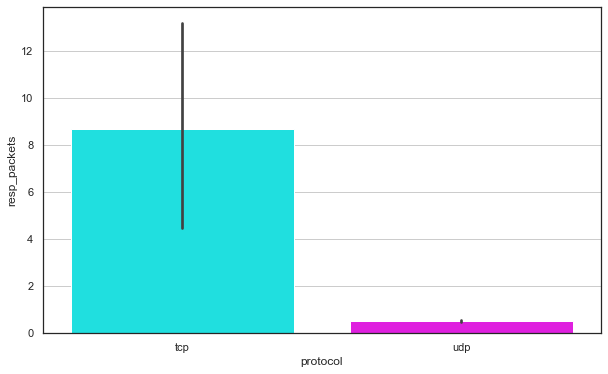

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=normal_ip, palette=['cyan', 'magenta'])
plt.grid(axis='y')

#### Anomalous flows

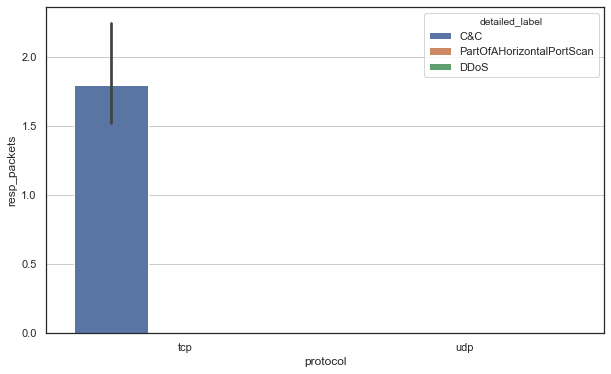

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=anomalous, hue='detailed_label')
plt.grid(axis='y')

### Bytes sent per protocol

#### Normal flows

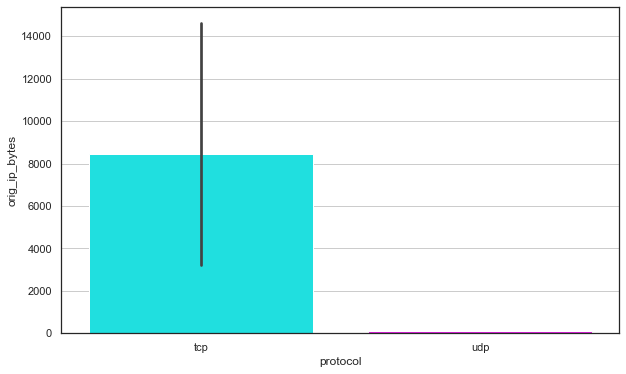

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=normal_ip, palette=['cyan', 'magenta'])
plt.grid(axis='y')

#### Anomalous flows

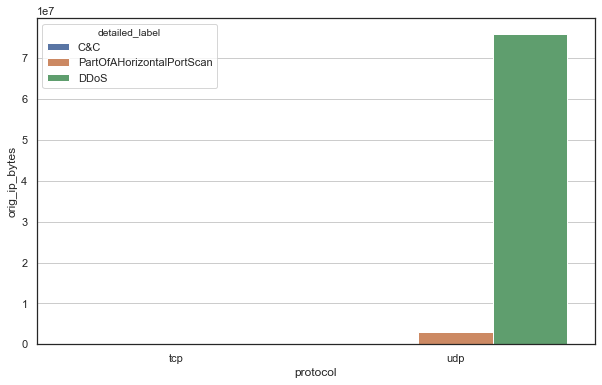

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=anomalous, hue='detailed_label')
plt.grid(axis='y')

### Bytes received per protocol

#### Normal flows

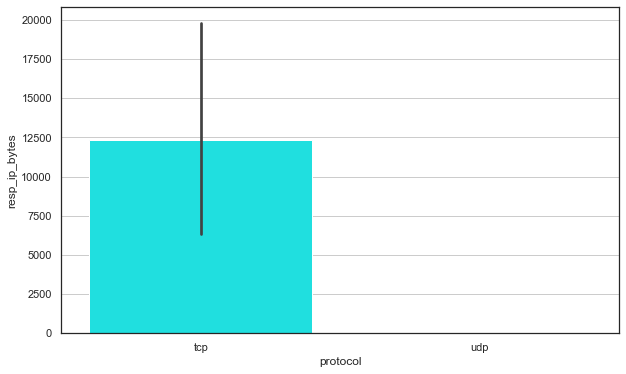

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=normal_ip, palette=['cyan', 'magenta'])
plt.grid(axis='y')

#### Anomalous flows

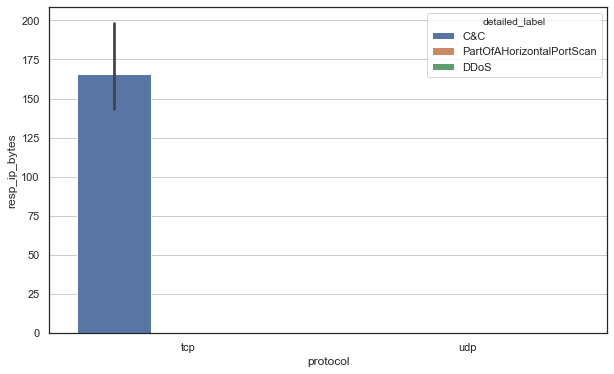

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=anomalous, hue='detailed_label')
plt.grid(axis='y')

### Duration per protocol

#### Normal flows

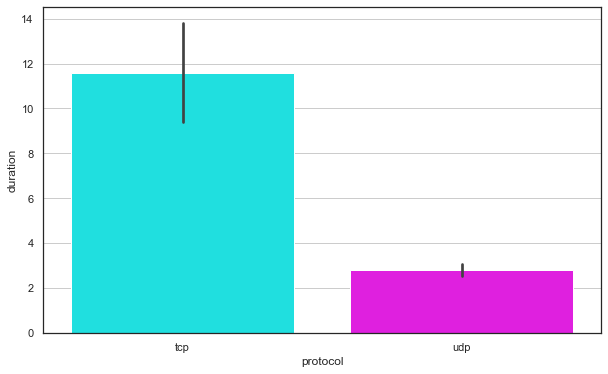

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=normal_ip, palette=['cyan', 'magenta'])
plt.grid(axis='y')

#### Anomalous flows

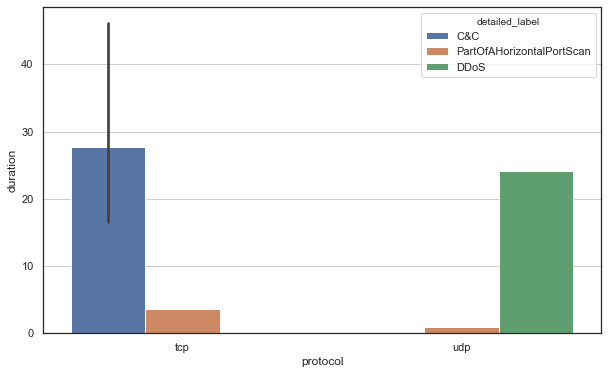

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=anomalous, hue='detailed_label')
plt.grid(axis='y')

## Connection level analysis

### Duration and avg time difference between flows per connection

#### Normal flows

In [3]:
normal_grouped_connection_time = normal.groupby(['src_ip', 'dst_ip']).agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
normal_grouped_connection_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
normal_grouped_connection_time = normal_grouped_connection_time.sort_values(by=['count'], ascending=False).reset_index()
normal_grouped_connection_time

/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,src_ip,dst_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.1.195,147.231.100.5,775,0.030385,0.009998,0.273853,0.001248,0.046869,00:01:13.257263,00:01:05.999651,00:18:01.000082,00:01:03.990075,00:01:26.720279
1,192.168.1.195,192.168.1.1,194,4.210705,5.003381,5.320735,0.000497,1.728899,00:06:53.321294,00:00:10.008806,08:03:46.924427,00:00:00.001742,00:50:33.351089
2,192.168.1.195,195.113.144.201,160,2.693623,2.693623,10.064781,0.001731,1.788158,00:09:01.924535,00:04:28.999578,00:18:06.996757,00:01:03.998934,00:07:30.319641
3,192.168.1.195,82.113.53.40,154,4.630235,4.630235,10.075264,0.003745,1.451194,00:09:23.307736,00:08:44.999159,00:18:06.999653,00:01:03.923563,00:07:40.560033
4,192.168.1.195,77.78.107.252,136,7.011989,7.011989,70.001583,0.001996,5.848893,00:09:47.029646,00:08:46.999616,00:18:06.001657,00:01:03.999946,00:07:22.952014
5,192.168.1.195,81.2.248.189,119,1.995904,1.995904,9.927838,0.005231,0.816385,00:08:05.492715,00:02:09.000319,00:33:47.108299,00:01:03.980336,00:08:15.407058
6,192.168.1.195,89.221.210.188,102,2.001978,2.001978,9.983282,0.004495,1.250933,00:14:11.405945,00:17:18.999423,00:18:06.002233,00:08:32.000297,00:04:19.341913
7,192.168.1.195,185.244.25.235,65,17.646373,27.634336,27.634336,0.885992,12.345670,00:00:19.450318,00:00:08.399980,00:01:10.121347,00:00:00.972195,00:00:21.009416
8,192.168.1.195,78.108.102.237,41,23.843260,23.843260,72.172598,0.002495,9.794332,00:32:51.001840,00:17:23.499998,13:12:17.965387,00:01:03.999718,02:03:20.894313
9,192.168.1.195,50.50.50.53,41,2.990541,2.990541,4.984894,1.627324,0.459630,00:00:00.255672,00:00:00.000252,00:00:00.829025,00:00:00.000006,00:00:00.289286


#### Anomalous flows

In [4]:
anomalous_grouped_connection_time = anomalous.groupby(['src_ip', 'dst_ip']).agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
anomalous_grouped_connection_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
anomalous_grouped_connection_time = anomalous_grouped_connection_time.sort_values(by=['count'], ascending=False).reset_index()
anomalous_grouped_connection_time

,src_ip,dst_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.1.195,123.59.209.185,14260,0.000010,0.000010,0.000010,0.000010,0.000000,00:00:00.002105,00:00:00.000249,00:00:00.659626,00:00:00.000005,00:00:00.025520
1,192.168.1.195,185.244.25.235,6706,27.731147,3.159205,48976.819063,0.833774,643.491422,00:00:12.838417,00:00:04.040942,09:22:39.564902,00:00:00.000006,00:06:55.106696
2,192.168.1.195,71.61.66.148,133,3.214980,3.214980,4.989434,0.008748,0.491871,00:00:00.164225,00:00:00.000249,00:00:00.598441,00:00:00.000005,00:00:00.253014
3,192.168.1.195,66.67.61.168,121,3.608289,3.608289,4.988906,1.715264,0.320826,00:00:00.170911,00:00:00.000250,00:00:00.584916,00:00:00.000005,00:00:00.256450
4,192.168.1.195,1.1.1.1,1,0.938716,0.938716,0.938716,0.938716,NaN,NaT,NaT,NaT,NaT,NaT
5,192.168.1.195,74.91.117.248,1,24.128182,24.128182,24.128182,24.128182,NaN,NaT,NaT,NaT,NaT,NaT


### Packets and bytes statistics per connection

#### Normal flows

In [5]:
normal_grouped_connection_pb = normal.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
normal_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
normal_grouped_connection_pb = normal_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
normal_grouped_connection_pb

,src_ip,dst_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,192.168.1.195,147.231.100.5,775,1.000000,1,1,1,0.000000,76.000000,76,...,0.905806,1,1,0,0.292286,68.841290,76,76,0,22.213769
1,192.168.1.195,192.168.1.1,194,1.804124,2,4,1,0.560148,124.030928,134,...,0.237113,0,2,0,0.450059,30.608247,0,328,0,62.906141
2,192.168.1.195,195.113.144.201,160,1.218750,1,6,1,1.025903,92.625000,76,...,0.375000,0,6,0,1.222175,28.500000,0,456,0,92.885268
3,192.168.1.195,82.113.53.40,154,1.194805,1,6,1,0.970667,90.805195,76,...,0.266234,0,6,0,1.114622,20.233766,0,456,0,84.711258
4,192.168.1.195,77.78.107.252,136,1.308824,1,8,1,1.250272,99.470588,76,...,0.397059,0,8,0,1.301164,30.176471,0,608,0,98.888481
5,192.168.1.195,81.2.248.189,119,1.042017,1,6,1,0.458349,79.193277,76,...,0.067227,0,4,0,0.406120,5.109244,0,304,0,30.865150
6,192.168.1.195,89.221.210.188,102,1.098039,1,6,1,0.696665,83.450980,76,...,0.186275,0,6,0,0.805063,14.156863,0,456,0,61.184795
7,192.168.1.195,185.244.25.235,65,16.261538,1,114,1,31.840068,965.323077,60,...,14.676923,0,117,0,31.870886,20926.553846,0,168910,0,45550.630970
8,192.168.1.195,78.108.102.237,41,1.317073,1,8,1,1.331147,100.097561,76,...,0.390244,0,8,0,1.547224,29.658537,0,608,0,117.589032
9,192.168.1.195,50.50.50.53,41,474.073171,1,5110,1,1232.002240,18962.926829,40,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000


#### Anomalous flows

In [6]:
anomalous_grouped_connection_pb = anomalous.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
anomalous_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
anomalous_grouped_connection_pb = anomalous_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
anomalous_grouped_connection_pb

,src_ip,dst_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,192.168.1.195,123.59.209.185,14260,0.000000,0,0,0,0.000000,0.000000e+00,0,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
1,192.168.1.195,185.244.25.235,6706,3.691619,3,606,1,9.039546,2.295731e+02,180,...,1.795556,0,1070,0,14.802255,165.562034,0,74159,0,1119.830511
2,192.168.1.195,71.61.66.148,133,305.022556,1,5110,1,1088.832941,1.220090e+04,40,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
3,192.168.1.195,66.67.61.168,121,314.545455,1,5110,1,1095.849130,1.258182e+04,40,...,0.000000,0,0,0,0.000000,0.000000,0,0,0,0.000000
4,192.168.1.195,1.1.1.1,1,719.000000,719,719,719,NaN,2.965156e+06,2965156,...,0.000000,0,0,0,NaN,0.000000,0,0,0,NaN
5,192.168.1.195,74.91.117.248,1,18444.000000,18444,18444,18444,NaN,7.606306e+07,76063056,...,0.000000,0,0,0,NaN,0.000000,0,0,0,NaN


### Source and destination ports, as well as protocol statistics per connection

#### Normal flows

In [7]:
normal_grouped_connection_net = normal.groupby(['src_ip', 'dst_ip']).agg({'src_port': ['count', 'nunique'], 'dst_port': 'nunique', 'protocol': 'nunique'})
normal_grouped_connection_net.columns = ['count', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
normal_grouped_connection_net = normal_grouped_connection_net.sort_values(by=['count'], ascending=False).reset_index()
normal_grouped_connection_net

,src_ip,dst_ip,count,number of unique source ports,number of unique destination ports,number of unique protocols
0,192.168.1.195,147.231.100.5,775,1,1,1
1,192.168.1.195,192.168.1.1,194,192,2,1
2,192.168.1.195,195.113.144.201,160,1,1,1
3,192.168.1.195,82.113.53.40,154,1,1,1
4,192.168.1.195,77.78.107.252,136,1,1,1
5,192.168.1.195,81.2.248.189,119,1,1,1
6,192.168.1.195,89.221.210.188,102,1,1,1
7,192.168.1.195,185.244.25.235,65,20,1,1
8,192.168.1.195,78.108.102.237,41,1,1,1
9,192.168.1.195,50.50.50.53,41,33,1,1


#### Anomalous flows

In [8]:
anomalous_grouped_connection_net = anomalous.groupby(['src_ip', 'dst_ip']).agg({'src_port': ['count', 'nunique'], 'dst_port': 'nunique', 'protocol': 'nunique'})
anomalous_grouped_connection_net.columns = ['count', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
anomalous_grouped_connection_net = anomalous_grouped_connection_net.sort_values(by=['count'], ascending=False).reset_index()
anomalous_grouped_connection_net

,src_ip,dst_ip,count,number of unique source ports,number of unique destination ports,number of unique protocols
0,192.168.1.195,123.59.209.185,14260,95,1,1
1,192.168.1.195,185.244.25.235,6706,4055,1,1
2,192.168.1.195,71.61.66.148,133,115,1,1
3,192.168.1.195,66.67.61.168,121,105,1,1
4,192.168.1.195,1.1.1.1,1,1,1,1
5,192.168.1.195,74.91.117.248,1,1,1,1


### Now let's keep the IP pairs with at least 100 flows in each class

#### Normal flows

In [9]:
normal_conn = normal.loc[(normal['src_ip'] == '192.168.1.195') & (normal['dst_ip'].isin(normal_grouped_connection_net.loc[normal_grouped_connection_net['count'] > 100]['dst_ip']))].reset_index(drop=True)
normal_conn['orig_packets_per_s'] = normal_conn['orig_packets'] / normal_conn['duration']
normal_conn['resp_packets_per_s'] = normal_conn['resp_packets'] / normal_conn['duration']
normal_conn['orig_bytes_per_s'] = normal_conn['orig_ip_bytes'] / normal_conn['duration']
normal_conn['resp_bytes_per_s'] = normal_conn['resp_ip_bytes'] / normal_conn['duration']
normal_conn['packets_diff'] = normal_conn['orig_packets'] - normal_conn['resp_packets']
normal_conn['bytes_diff'] = normal_conn['orig_ip_bytes'] - normal_conn['resp_ip_bytes']
normal_conn['packets_per_s_diff'] = normal_conn['orig_packets_per_s'] - normal_conn['resp_packets_per_s']
normal_conn['bytes_per_s_diff'] = normal_conn['orig_bytes_per_s'] - normal_conn['resp_bytes_per_s']
normal_conn

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-12-21 14:50:40.458699942,192.168.1.195,123,147.231.100.5,123,udp,0.001496,SF,0,1,...,1,1,668.449198,668.449198,50802.139037,50802.139037,0,0,0.000000,0.000000
1,2018-12-21 14:51:49.458606958,192.168.1.195,123,147.231.100.5,123,udp,0.001495,SF,0,1,...,1,1,668.896321,668.896321,50836.120401,50836.120401,0,0,0.000000,0.000000
2,2018-12-21 14:52:50.458575010,192.168.1.195,123,195.113.144.201,123,udp,2.693623,S0,0,1,...,1,0,0.371247,0.000000,28.214788,0.000000,1,76,0.371247,28.214788
3,2018-12-21 14:52:55.458724022,192.168.1.195,123,147.231.100.5,123,udp,0.001495,SF,0,1,...,1,1,668.896321,668.896321,50836.120401,50836.120401,0,0,0.000000,0.000000
4,2018-12-21 14:53:15.458585978,192.168.1.195,123,82.113.53.40,123,udp,4.630235,S0,0,1,...,1,0,0.215972,0.000000,16.413855,0.000000,1,76,0.215972,16.413855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,2018-12-22 14:49:53.461163044,192.168.1.195,55349,192.168.1.1,53,udp,0.013484,SF,0,1,...,1,1,74.161970,74.161970,4968.851973,9715.218036,0,-64,0.000000,-4746.366063
1636,2018-12-22 14:49:53.475646019,192.168.1.195,43718,192.168.1.1,53,udp,4.210705,S0,0,1,...,1,0,0.237490,0.000000,15.911824,0.000000,1,67,0.237490,15.911824
1637,2018-12-22 14:49:58.459568024,192.168.1.195,123,89.221.210.188,123,udp,2.001978,S0,0,1,...,1,0,0.499506,0.000000,37.962448,0.000000,1,76,0.499506,37.962448
1638,2018-12-22 14:49:59.460982084,192.168.1.195,60967,192.168.1.1,53,udp,5.001395,S0,0,2,...,1,0,0.399888,0.000000,26.792525,0.000000,2,134,0.399888,26.792525


In [10]:
normal_conn.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,1640.000000,1640.000000,1640.000000,1640.0,1640.000000,1640.000000,1640.000000,1640.000000,1640.0,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000,1640.000000
mean,5561.140244,114.736585,2.060857,0.0,1.169512,87.335366,0.567073,44.586585,1.0,0.500000,156.932080,155.306969,11997.171070,12144.401187,0.602439,42.748780,1.625111,-147.230117
std,15219.720237,22.572319,3.002080,0.0,0.682240,50.815723,0.790665,62.296795,0.0,0.500153,276.618244,277.447437,22285.201717,23673.177653,0.655753,47.797879,6.757328,5440.948838
min,68.000000,53.000000,0.000497,0.0,1.000000,67.000000,0.000000,0.000000,1.0,0.000000,0.114283,0.000000,8.685518,0.000000,0.000000,-119.000000,0.000000,-128772.635815
25%,123.000000,123.000000,0.006986,0.0,1.000000,76.000000,0.000000,0.000000,1.0,0.000000,0.371247,0.000000,26.791211,0.000000,0.000000,0.000000,0.000000,0.000000
50%,123.000000,123.000000,0.159028,0.0,1.000000,76.000000,0.500000,33.500000,1.0,0.500000,6.288234,0.057142,486.826118,4.342759,1.000000,67.000000,0.142613,10.838580
75%,123.000000,123.000000,4.630235,0.0,1.000000,76.000000,1.000000,76.000000,1.0,1.000000,143.148553,143.148553,10879.290025,10879.290025,1.000000,76.000000,0.371247,28.214788
max,60967.000000,123.000000,70.001583,0.0,8.000000,608.000000,8.000000,608.000000,1.0,1.000000,2012.072435,2012.072435,373747.494990,328657.314629,4.000000,268.000000,32.910567,45090.180361


#### Anomalous flows

In [11]:
anomalous_conn = anomalous.loc[(anomalous['src_ip'] == '192.168.1.195') & (anomalous['dst_ip'].isin(anomalous_grouped_connection_net.loc[anomalous_grouped_connection_net['count'] > 100]['dst_ip']))].reset_index(drop=True)
anomalous_conn['orig_packets_per_s'] = anomalous_conn['orig_packets'] / anomalous_conn['duration']
anomalous_conn['resp_packets_per_s'] = anomalous_conn['resp_packets'] / anomalous_conn['duration']
anomalous_conn['orig_bytes_per_s'] = anomalous_conn['orig_ip_bytes'] / anomalous_conn['duration']
anomalous_conn['resp_bytes_per_s'] = anomalous_conn['resp_ip_bytes'] / anomalous_conn['duration']
anomalous_conn['packets_diff'] = anomalous_conn['orig_packets'] - anomalous_conn['resp_packets']
anomalous_conn['bytes_diff'] = anomalous_conn['orig_ip_bytes'] - anomalous_conn['resp_ip_bytes']
anomalous_conn['packets_per_s_diff'] = anomalous_conn['orig_packets_per_s'] - anomalous_conn['resp_packets_per_s']
anomalous_conn['bytes_per_s_diff'] = anomalous_conn['orig_bytes_per_s'] - anomalous_conn['resp_bytes_per_s']
anomalous_conn

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-12-21 14:55:32.353979111,192.168.1.195,48986,185.244.25.235,6667,tcp,3.107733,S0,0,3,...,0,0,0.965334,0.000000,57.920034,0.000000,3,180,0.965334,57.920034
1,2018-12-21 14:55:39.541642904,192.168.1.195,48986,185.244.25.235,6667,tcp,48976.819063,RSTR,0,606,...,0,3,0.012373,0.021847,0.931665,1.514165,-464,-28529,-0.009474,-0.582500
2,2018-12-21 15:00:09.843813896,192.168.1.195,48994,185.244.25.235,6667,tcp,1.128098,S3,0,7,...,0,2,6.205135,5.318687,396.242170,499.070116,1,-116,0.886448,-102.827946
3,2018-12-21 15:00:10.924437046,192.168.1.195,48998,185.244.25.235,6667,tcp,3.097488,S0,0,3,...,0,0,0.968527,0.000000,58.111605,0.000000,3,180,0.968527,58.111605
4,2018-12-21 15:00:18.101866007,192.168.1.195,48998,185.244.25.235,6667,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21215,2018-12-22 14:49:53.942378998,192.168.1.195,57116,185.244.25.235,6667,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
21216,2018-12-22 14:49:56.773278952,192.168.1.195,57118,185.244.25.235,6667,tcp,3.088974,S0,0,3,...,0,0,0.971196,0.000000,58.271776,0.000000,3,180,0.971196,58.271776
21217,2018-12-22 14:50:03.942172050,192.168.1.195,57118,185.244.25.235,6667,tcp,27.634336,S0,0,1,...,0,0,0.036187,0.000000,2.171212,0.000000,1,60,0.036187,2.171212
21218,2018-12-22 14:50:06.779314995,192.168.1.195,57120,185.244.25.235,6667,tcp,3.082978,S0,0,3,...,0,0,0.973085,0.000000,58.385107,0.000000,3,180,0.973085,58.385107


In [12]:
anomalous_conn.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,21220.000000,21220.000000,21220.000000,21220.0,21220.000000,21220.000000,21220.000000,21220.000000,21220.0,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000,21220.000000
mean,60892.509708,2524.971725,8.804402,0.0,4.872008,220.765174,0.567436,52.321348,0.0,3.517578,1.583342,0.189438,71.361249,17.506357,4.304571,168.443827,1.393904,53.854892
std,7435.976724,5557.521500,361.954886,0.0,123.775139,4960.553281,8.362568,634.179444,0.0,2.179711,39.885622,0.914482,1596.142147,84.573340,123.727929,4954.479072,39.877248,1595.283659
min,0.000000,80.000000,0.000010,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-464.000000,-28529.000000,-0.793775,-174.630478
25%,55220.000000,80.000000,0.000010,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65279.000000,80.000000,0.000010,0.0,0.000000,0.000000,0.000000,0.000000,0.0,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65279.000000,6667.000000,3.105482,0.0,1.000000,60.000000,0.000000,0.000000,0.0,5.000000,0.036187,0.000000,2.171212,0.000000,1.000000,40.000000,0.036187,2.171212
max,65279.000000,63798.000000,48976.819063,0.0,5110.000000,204400.000000,1070.000000,74159.000000,0.0,5.000000,2574.939125,7.777899,102997.565003,675.242932,5110.000000,204400.000000,2574.939125,102997.565003


### Remove outliers

#### Normal flows

In [ ]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
normal_conn = normal_conn[(np.abs(stats.zscore(normal_conn[continuous])) < 3).all(axis=1)]
normal_conn.describe()

#### Anomalous flows

In [ ]:
anomalous_conn = anomalous_conn[(np.abs(stats.zscore(anomalous_conn[continuous])) < 3).all(axis=1)]
anomalous_conn.describe()

### Now let's plot!!

### Heatmap of all the flows

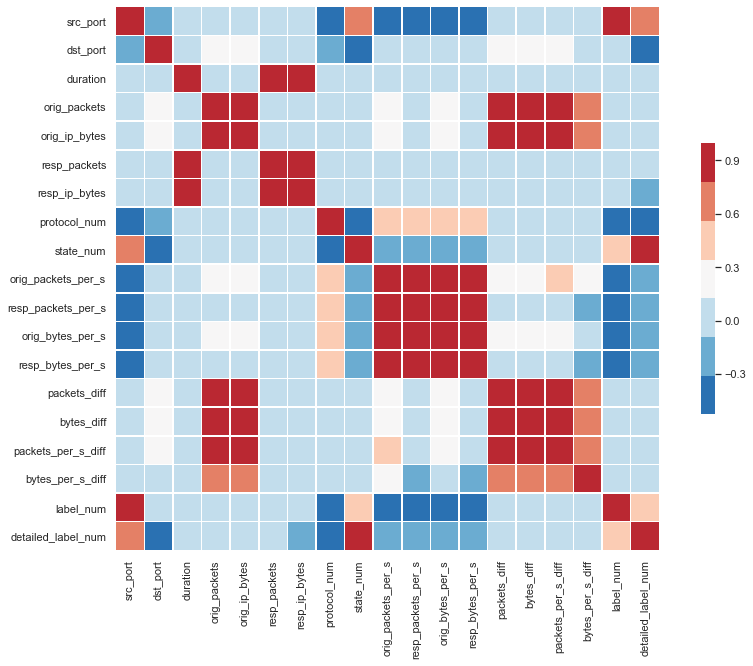

In [13]:
data_conn = pd.concat([normal_conn, anomalous_conn], ignore_index=True).sort_values(by='date')
data_conn['label_num'] = pd.Categorical(data_conn['label'], categories=data_conn['label'].unique()).codes
data_conn['detailed_label_num'] = pd.Categorical(data_conn['detailed_label'], categories=data_conn['detailed_label'].unique()).codes
sns.set(style="white")
corr = data_conn.drop(columns='missed_bytes').corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Heatmap of anomalous flows

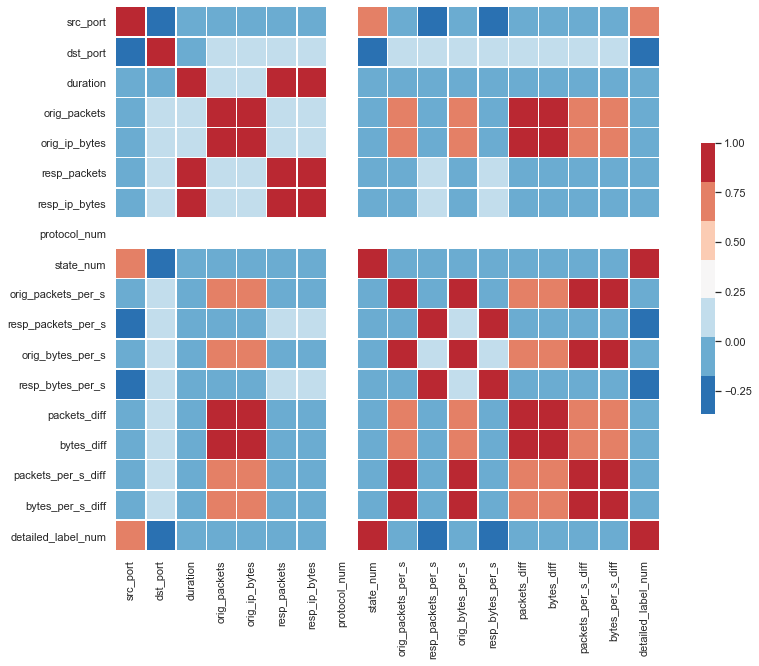

In [14]:
sns.set(style="white")
corr = data_conn.drop(columns=['label_num', 'missed_bytes'])[data_conn['detailed_label_num'] != 0].corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Duration against time

#### Normal connections

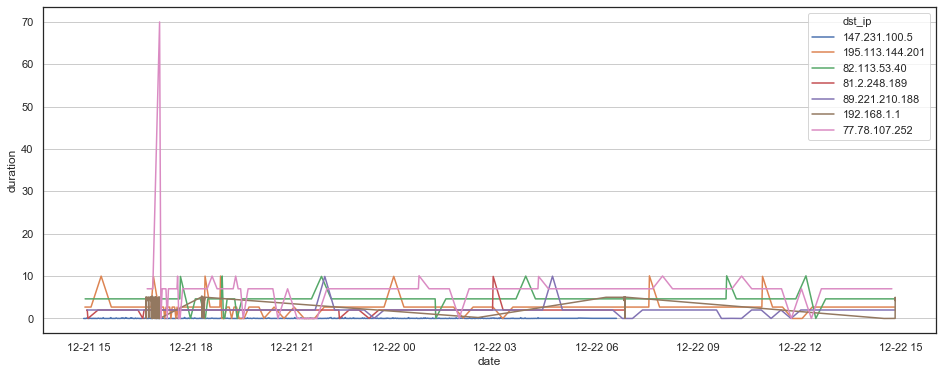

In [15]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')

#### Anomalous connections

Text(0.5, 1.0, 'C&C connection')

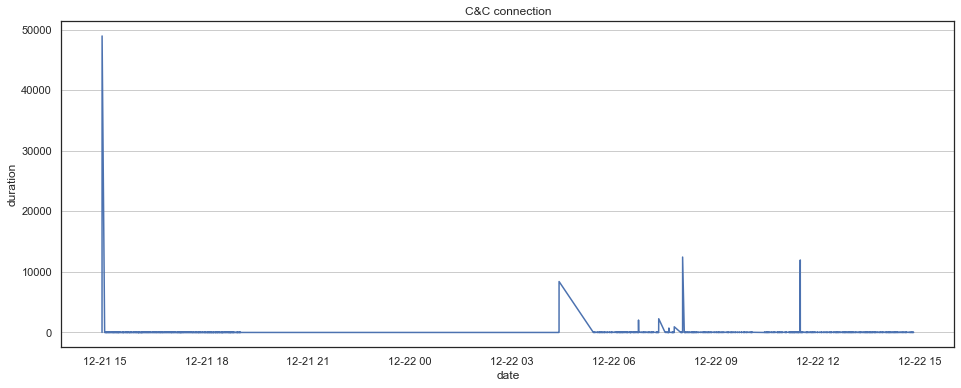

In [16]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'])
plt.grid(axis='y')
plt.title('C&C connection')

Text(0.5, 1.0, 'Port scan connection')

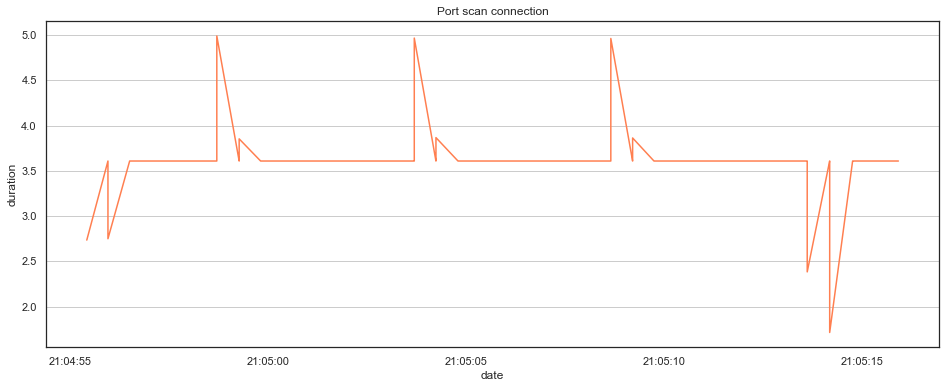

In [17]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'], color='coral')
plt.grid(axis='y')
plt.title('Port scan connection')

Text(0.5, 1.0, 'DDoS connection - Big')

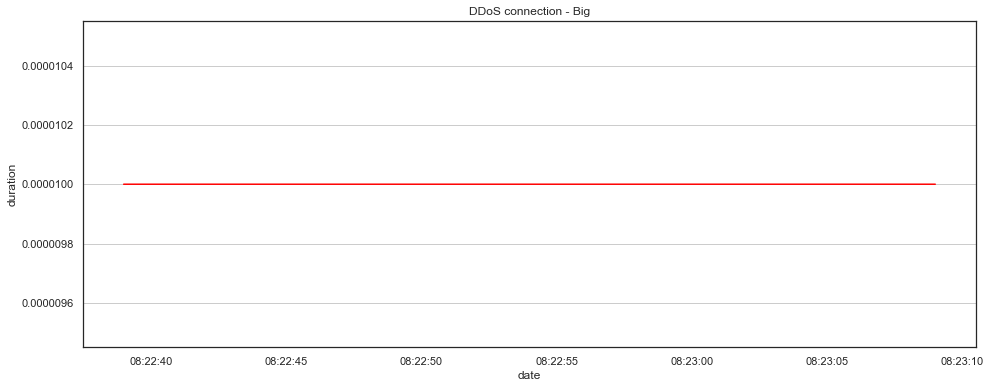

In [18]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'], color='red')
plt.grid(axis='y')
plt.title('DDoS connection - Big')

Text(0.5, 1.0, 'DDoS connection - Small')

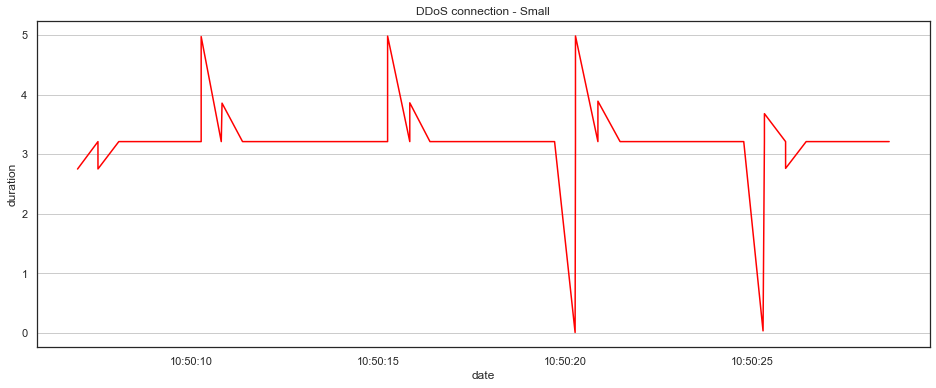

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'], color='red')
plt.grid(axis='y')
plt.title('DDoS connection - Small')

### Number of bytes against time

#### Normal connections

Text(0.5, 1.0, "Originator's bytes")

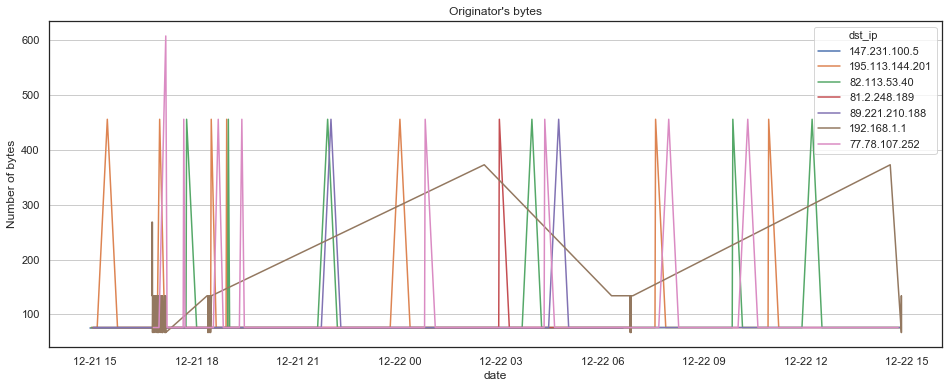

In [20]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Number of bytes")
plt.title("Originator's bytes")

Text(0.5, 1.0, "Responder's bytes")

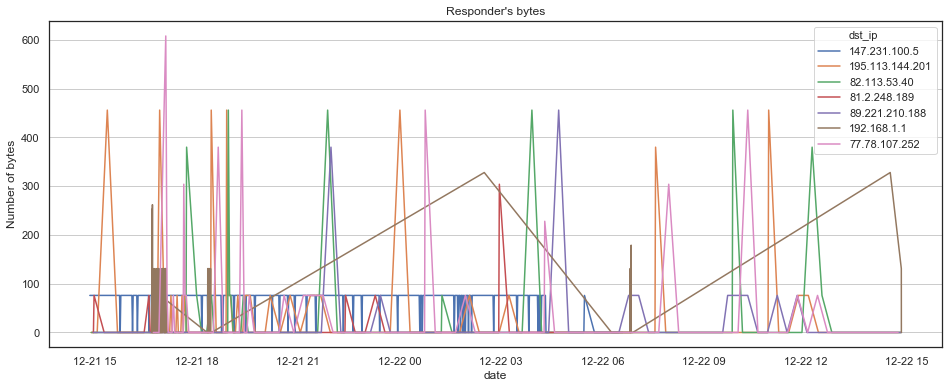

In [21]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_ip_bytes", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Number of bytes")
plt.title("Responder's bytes")

#### Anomalous connections

Text(0.5, 1.0, 'C&C bytes')

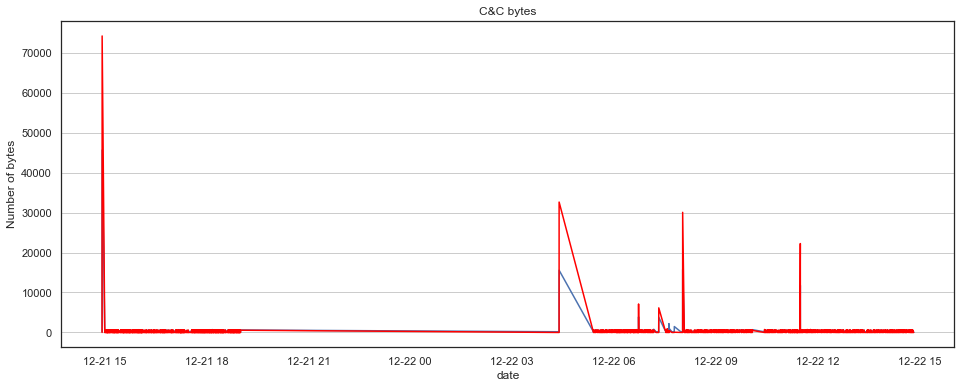

In [22]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'])
sns.lineplot(x="date", y="resp_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of bytes")
plt.title("C&C bytes")

Text(0.5, 1.0, 'Port scan bytes')

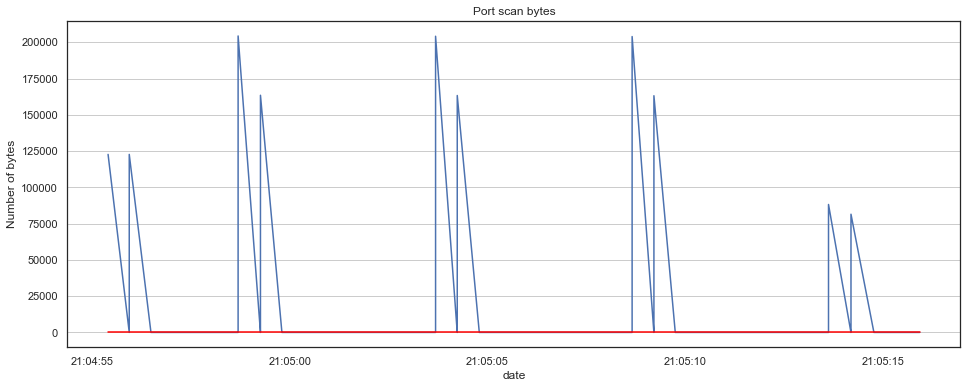

In [23]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'])
sns.lineplot(x="date", y="resp_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of bytes")
plt.title("Port scan bytes")

Text(0.5, 1.0, 'DDoS bytes - Big')

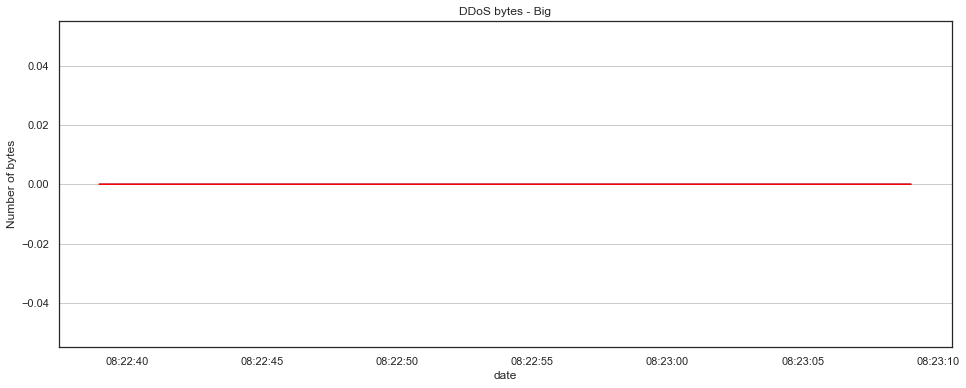

In [24]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'])
sns.lineplot(x="date", y="resp_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of bytes")
plt.title("DDoS bytes - Big")

Text(0.5, 1.0, 'DDoS bytes - Small')

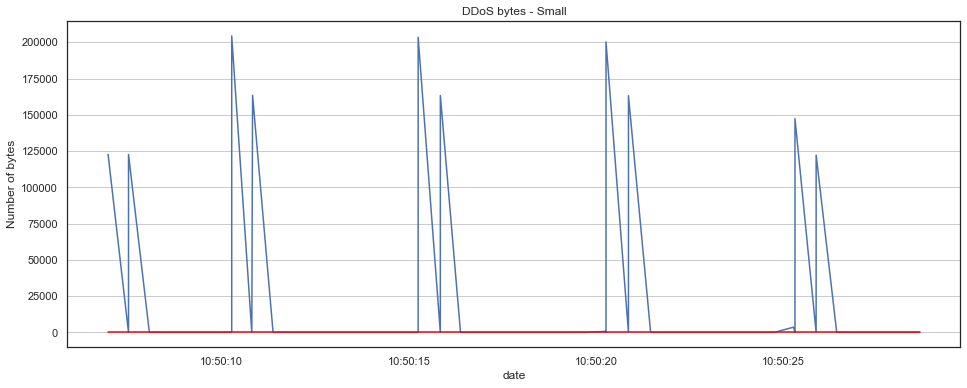

In [25]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'])
sns.lineplot(x="date", y="resp_ip_bytes", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of bytes")
plt.title("DDoS bytes - Small")

### Number of packets against time

#### Normal connections

Text(0.5, 1.0, "Originator's packets")

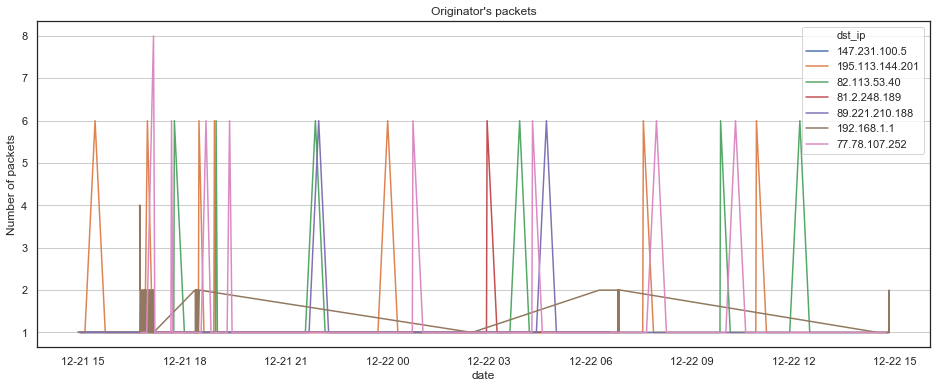

In [26]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Number of packets")
plt.title("Originator's packets")

Text(0.5, 1.0, "Responder's packets")

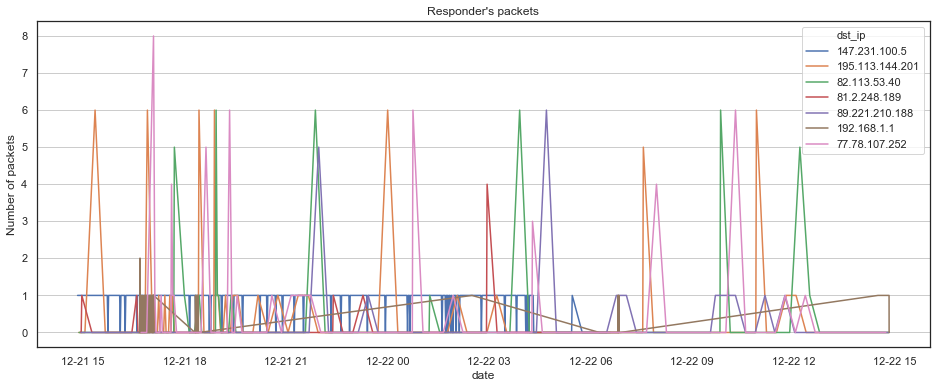

In [27]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Number of packets")
plt.title("Responder's packets")

#### Anomalous connections

Text(0.5, 1.0, 'C&C packets')

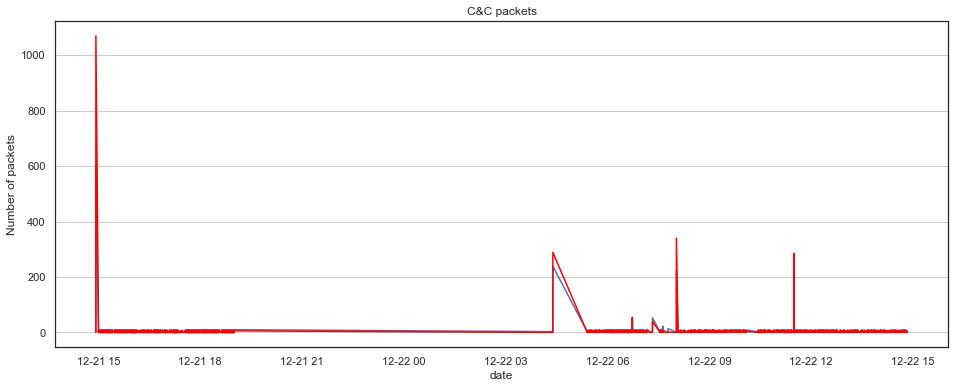

In [28]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'])
sns.lineplot(x="date", y="resp_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of packets")
plt.title("C&C packets")

Text(0.5, 1.0, 'Port scan packets')

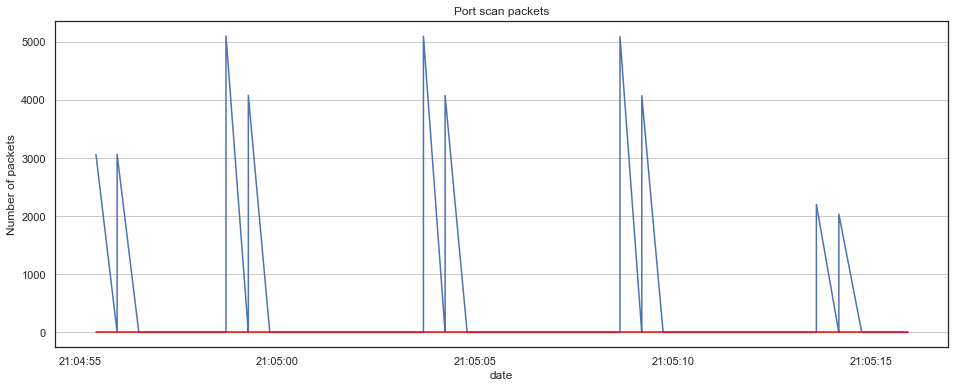

In [29]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'])
sns.lineplot(x="date", y="resp_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of packets")
plt.title("Port scan packets")

Text(0.5, 1.0, 'DDoS packets - Big')

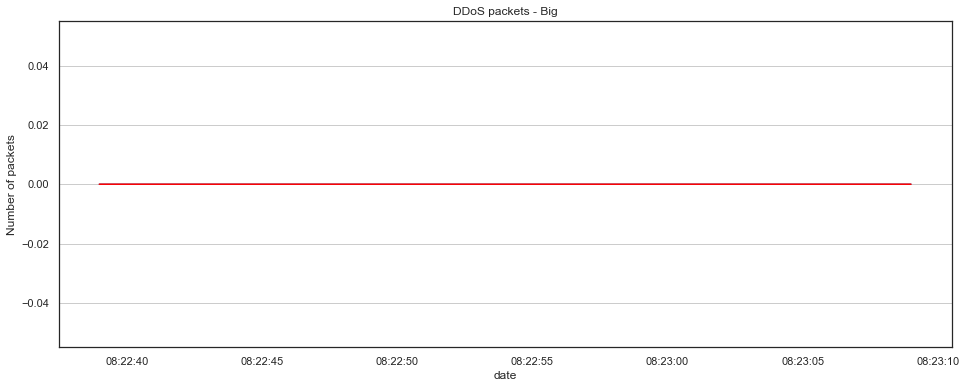

In [30]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'])
sns.lineplot(x="date", y="resp_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of packets")
plt.title("DDoS packets - Big")

Text(0.5, 1.0, 'DDoS packets - Small')

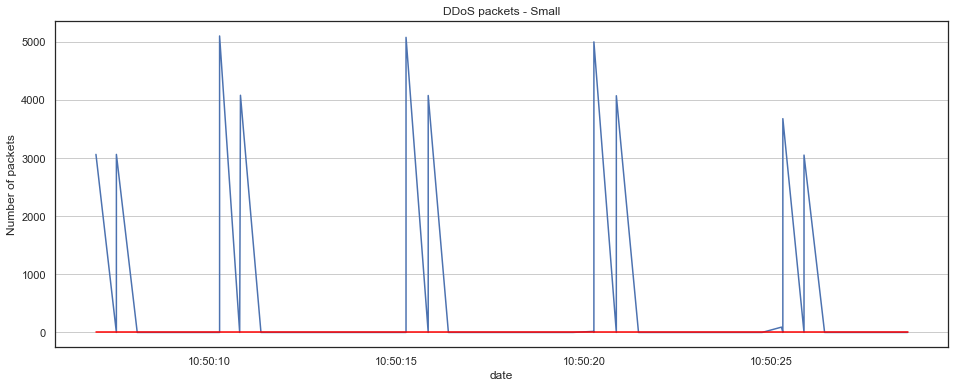

In [31]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'])
sns.lineplot(x="date", y="resp_packets", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'], color='red')
plt.grid(axis='y')
plt.ylabel("Number of packets")
plt.title("DDoS packets - Small")

### Originator's vs Responder's bytes/sec and packets/sec

#### Normal connections

Text(0, 0.5, "Originator's Packets / sec")

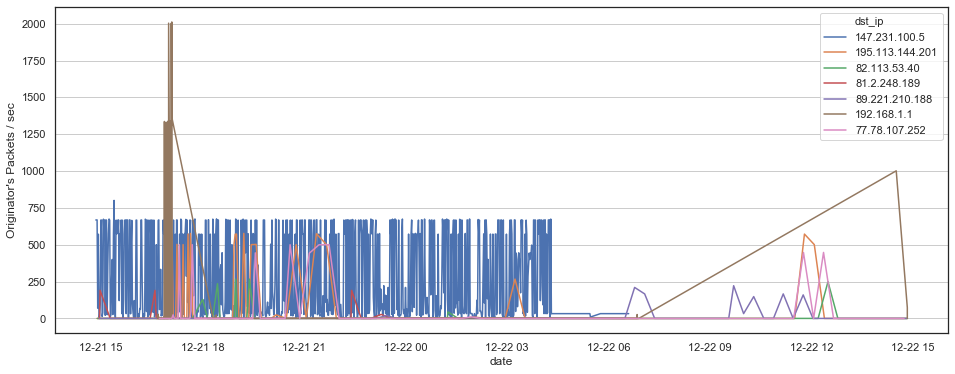

In [32]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Originator's Packets / sec")

Text(0, 0.5, "Responder's Packets / sec")

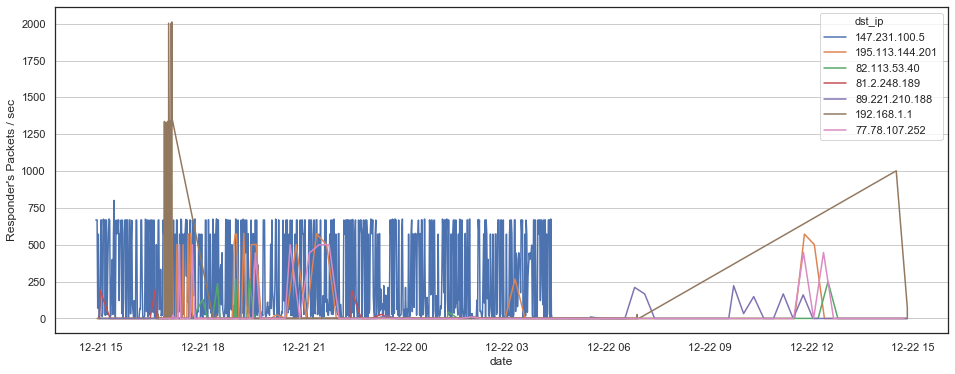

In [33]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_packets_per_s", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Responder's Packets / sec")

Text(0, 0.5, "Originator's Bytes / sec")

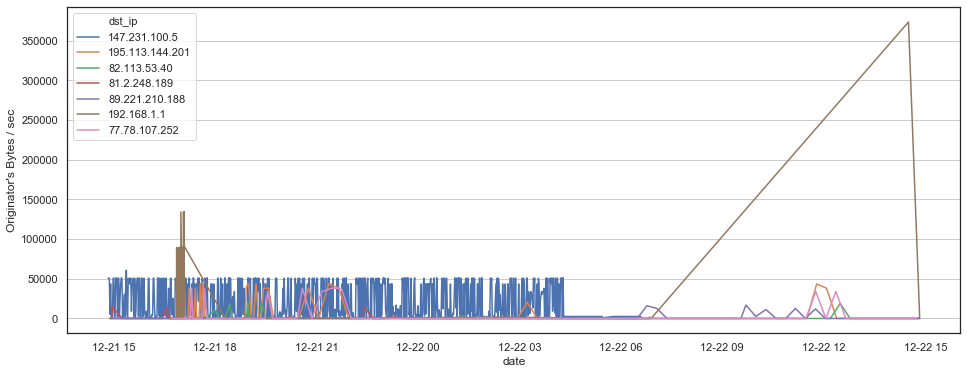

In [34]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Originator's Bytes / sec")

Text(0, 0.5, "Responder's Bytes / sec")

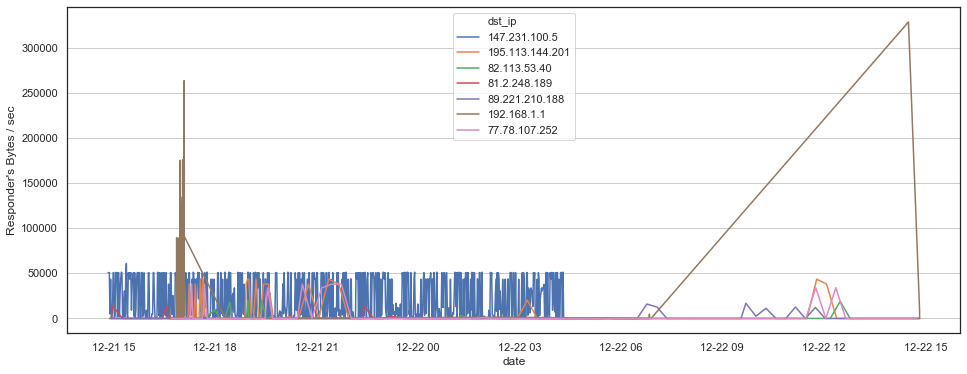

In [35]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="resp_bytes_per_s", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')
plt.ylabel("Responder's Bytes / sec")

#### Anomalous connections

Text(0, 0.5, 'C&C Packets / sec')

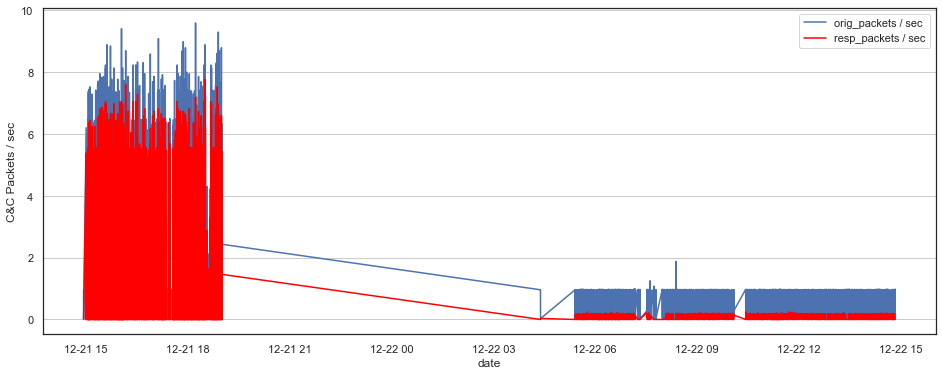

In [36]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'], label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'], label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("C&C Packets / sec")

Text(0, 0.5, 'C&C Bytes / sec')

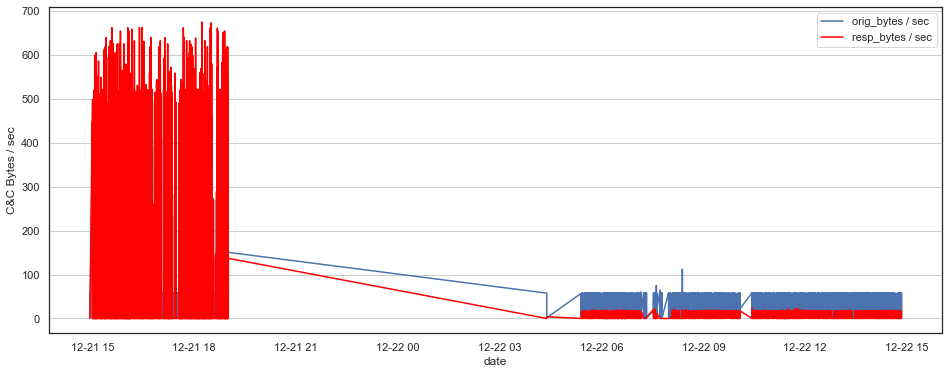

In [37]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'], label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '185.244.25.235'], label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("C&C Bytes / sec")

Text(0, 0.5, 'Port scan Packets / sec')

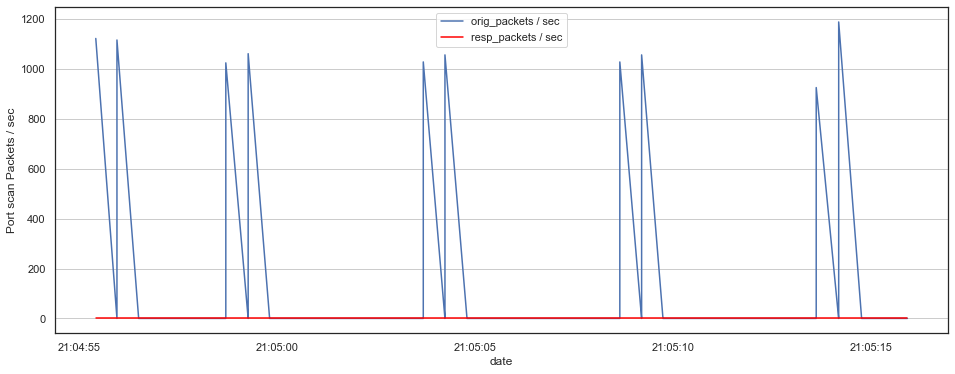

In [38]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'], label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'], label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Port scan Packets / sec")

Text(0, 0.5, 'Port scan Bytes / sec')

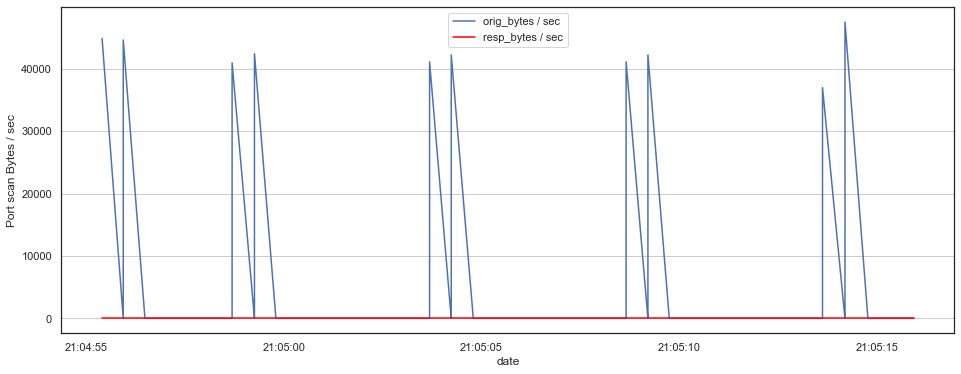

In [39]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'], label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '66.67.61.168'], label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Port scan Bytes / sec")

Text(0, 0.5, 'DDoS Packets / sec - Big')

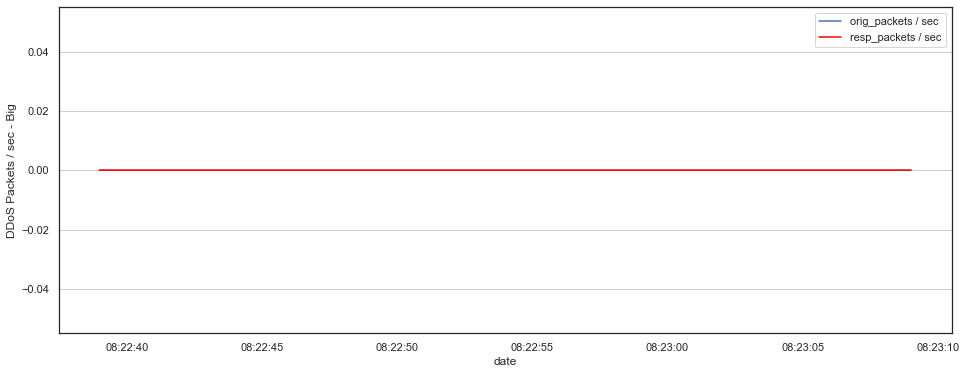

In [40]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'], label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'], label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("DDoS Packets / sec - Big")

Text(0, 0.5, 'DDoS Bytes / sec - Big')

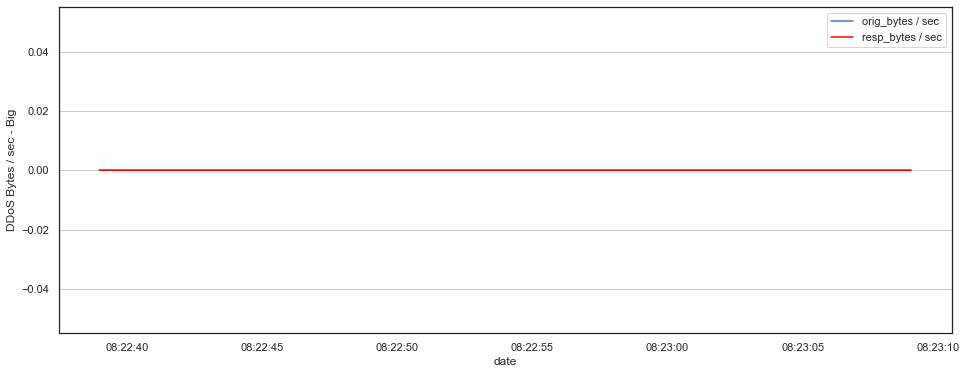

In [41]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'], label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '123.59.209.185'], label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("DDoS Bytes / sec - Big")

Text(0, 0.5, 'DDoS Packets / sec - Small')

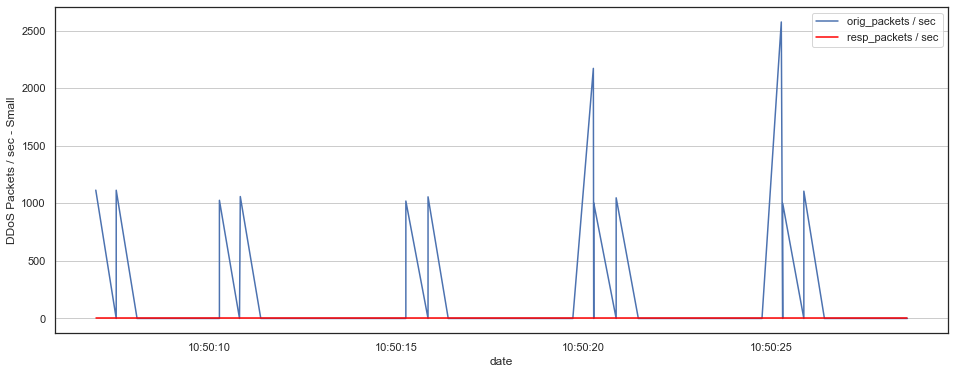

In [42]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'], label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'], label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("DDoS Packets / sec - Small")

Text(0, 0.5, 'DDoS Packets / sec - Small')

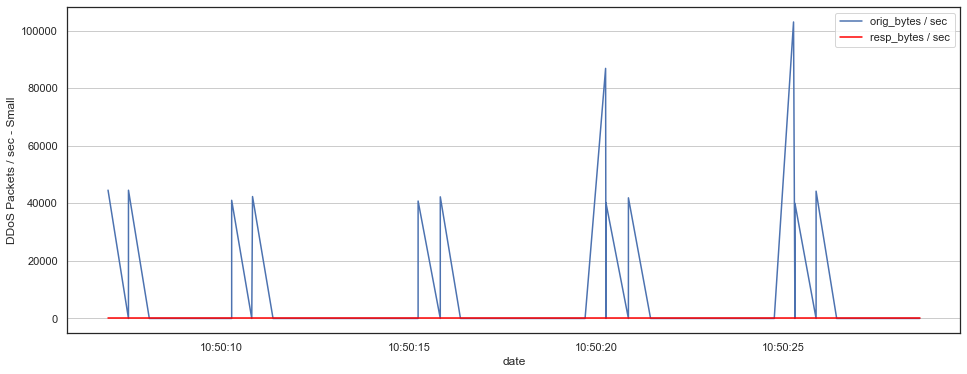

In [43]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'], label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=anomalous_conn[anomalous_conn['dst_ip'] == '71.61.66.148'], label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("DDoS Packets / sec - Small")

### Protocol distribution

#### Normal connections

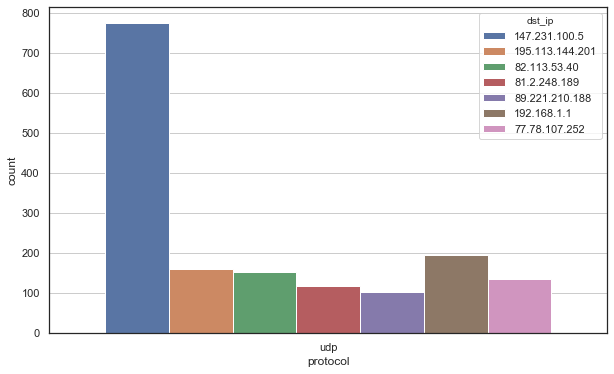

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')

#### Anomalous flows

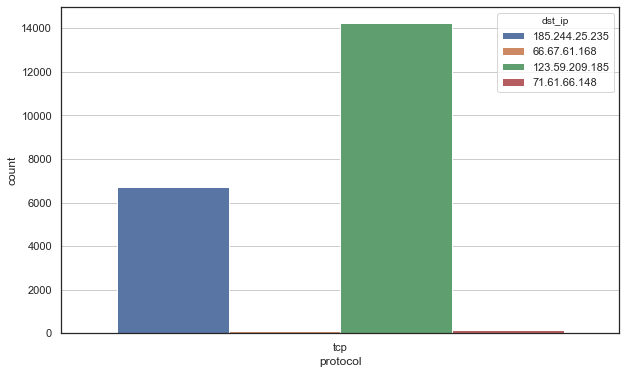

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=anomalous_conn, hue='dst_ip')
plt.grid(axis='y')

### Packets sent per protocol

#### Normal connections

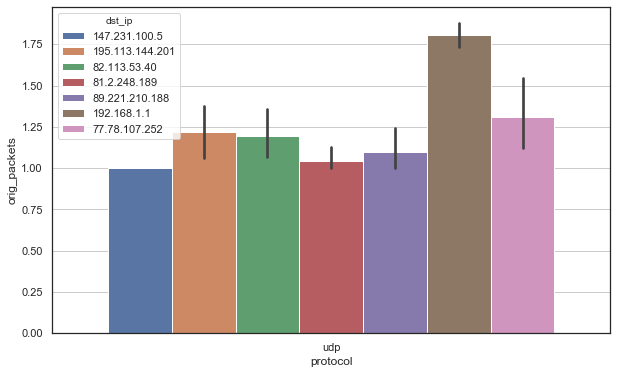

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')

#### Anomalous connections

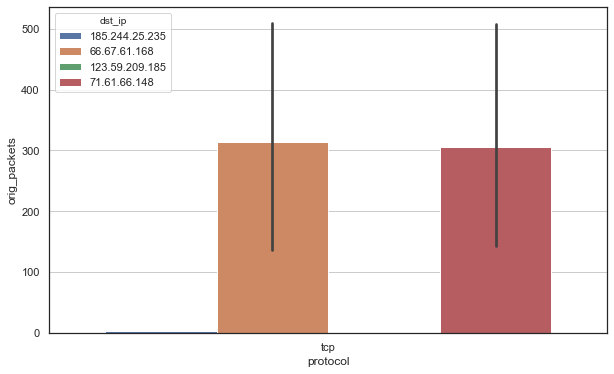

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=anomalous_conn, hue='dst_ip')
plt.grid(axis='y')

### Packets received per protocol

#### Normal connections

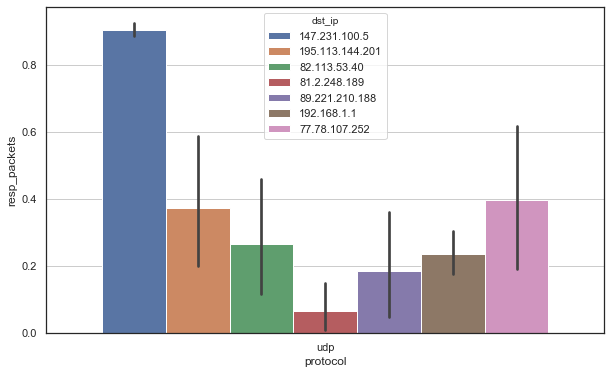

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')

#### Anomalous connections

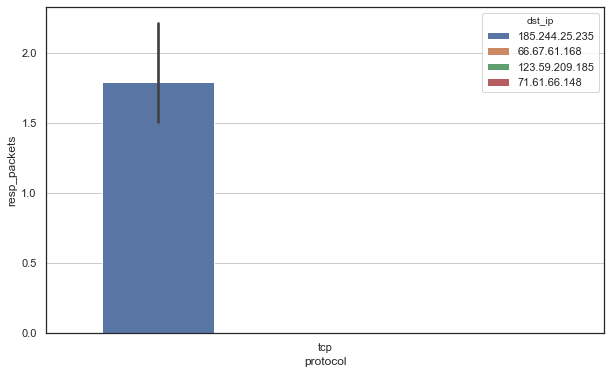

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=anomalous_conn, hue='dst_ip')
plt.grid(axis='y')

### Bytes sent per protocol

#### Normal connections

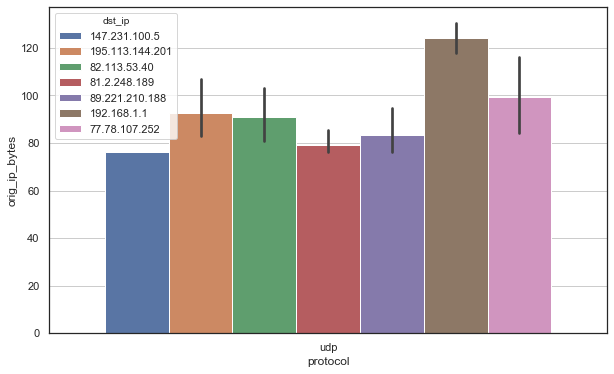

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')

#### Anomalous connections

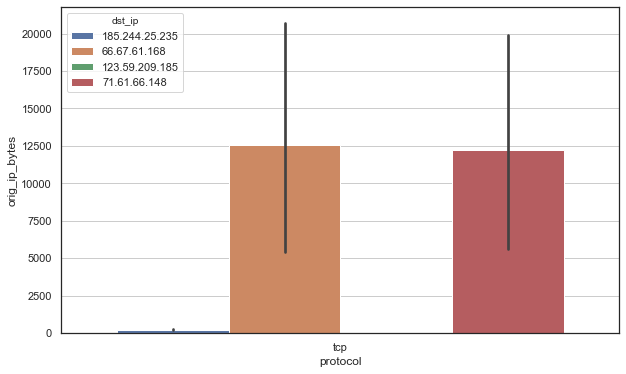

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=anomalous_conn, hue='dst_ip')
plt.grid(axis='y')

### Bytes received per protocol

#### Normal connections

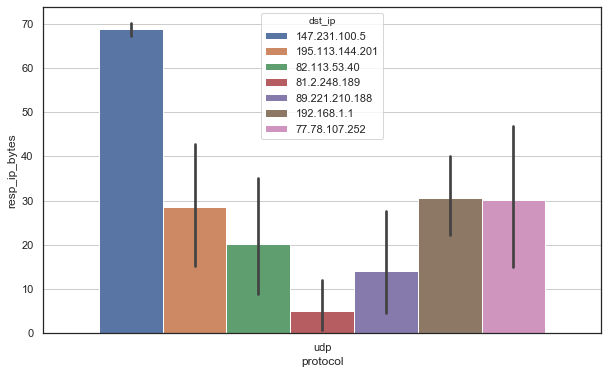

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')

#### Anomalous connections

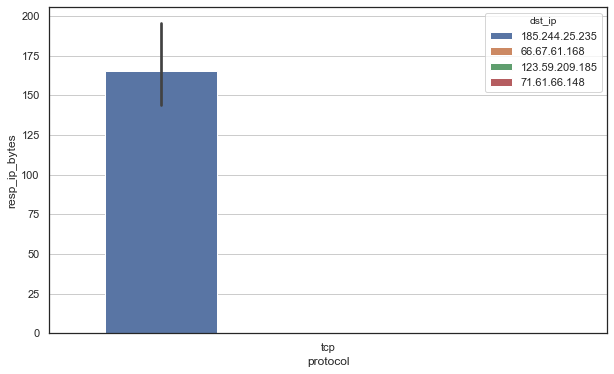

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=anomalous_conn, hue='dst_ip')
plt.grid(axis='y')

### Duration per protocol

#### Normal connections

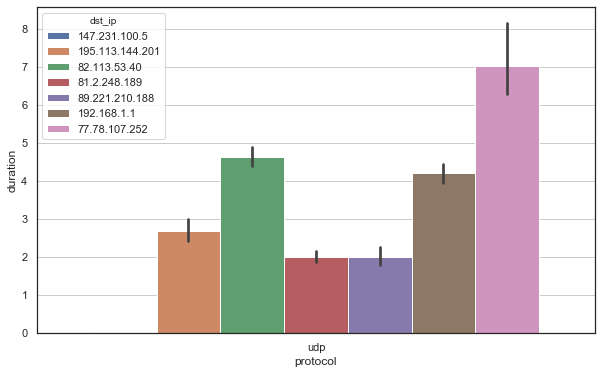

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=normal_conn, hue='dst_ip')
plt.grid(axis='y')

#### Anomalous connections

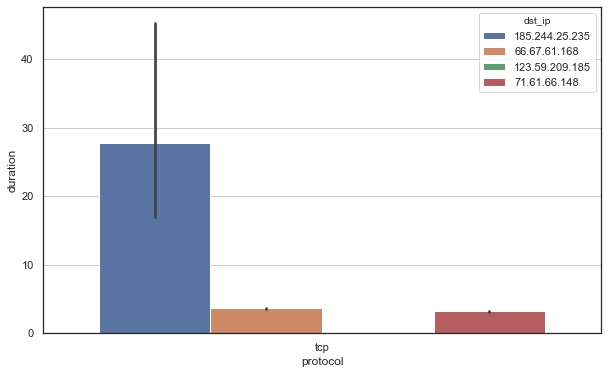

In [55]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=anomalous_conn, hue='dst_ip')
plt.grid(axis='y')